In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from random import seed
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot

In [ ]:
#upload sp500 csv
upload = files.upload()

Saving sp500.csv to sp500 (5).csv


In [ ]:
#download the sp500 csv
sp = pd.read_csv("sp500.csv")

#set the Date as index
sp.set_index("Date",inplace=True)
sp.index = pd.to_datetime(sp.index)

#data has comma separated value so I change it with dot
sp = sp.replace(",", ".", regex=True)
sp = sp.apply(pd.to_numeric, errors='coerce')

# take only the last monthly day
sp_monthly = sp.resample("ME").last()
sp_monthly.head()

SP500
Date                   
1998-12-31  3552.951548
1999-01-31  3705.292766
1999-02-28  3602.721400
1999-03-31  3753.447695
1999-04-30  3887.840112

In [ ]:
#upload indexes csv
upload = files.upload()

Saving US MSCI FACTOR INDEXES - no sp.csv to US MSCI FACTOR INDEXES - no sp (7).csv


In [ ]:
#download the etf csv
data = pd.read_csv("US MSCI FACTOR INDEXES - no sp (2).csv")

#set the Date as index
data.set_index("Date",inplace=True)
data.index = pd.to_datetime(data.index)

#data has comma separated value so I change it with dot
data = data.replace(",", ".", regex=True)
data = data.apply(pd.to_numeric, errors='coerce')

data.head()

MSCI USA Small Cap Index  MSCI USA Value Index  \
Date                                                         
1999-05-31                 71.918038           5077.468776   
1999-06-30                 76.314637           5220.719392   
1999-07-30                 77.321806           5075.684224   
1999-08-31                 74.865183           4914.013262   
1999-09-30                 74.664744           4689.282426   

            MSCI USA Growth Index  MSCI USA Small Cap Value Index  \
Date                                                                
1999-05-31            1000.000000                     2015.035886   
1999-06-30            1067.348638                     2099.676832   
1999-07-30            1031.725856                     2059.523260   
1999-08-31            1032.633547                     1974.027061   
1999-09-30            1017.916713                     1940.089666   

            MSCI USA Quality Index  MSCI USA Minimum Volatility Index   \
Date                                                                     
1999-05-31              628.828467                         1024.328421   
1999-06-30              667.340944                         1042.859726   
1999-07-30              650.056041                         1018.789268   
1999-08-31              657.341136                         1001.574751   
1999-09-30              633.429091                          966.140399   

            MSCI USA High Dividend Yield Index  \
Date                                             
1999-05-31                         1048.689248   
1999-06-30                         1077.208738   
1999-07-30                         1042.779112   
1999-08-31                          995.834721   
1999-09-30                          955.888976   

            MSCI USA Diversified Multiple-Factor Index  
Date                                                    
1999-05-31                                  274.516956  
1999-06-30                                  287.800342  
1999-07-30                                  278.743436  
1999-08-31                                  269.228432  
1999-09-30                                  259.875621

In [ ]:
# set the same index for merge
sp_monthly = sp_monthly.loc[data.index[0]:data.index[-1]]
data.set_index(sp_monthly.index,inplace=True)

# merge the data frame
data.insert(0, "Adj Close", sp_monthly.reindex(data.index))

# rename the columns
assets = ["SP500","Small_cap","Value","Growth","Small_cap_value","Quality","Min_volatility","High_dividend","Multifactor"]
benchmark = "SP500"
data.columns = assets
data.head()

SP500  Small_cap        Value       Growth  Small_cap_value  \
Date                                                                            
1999-05-31  3798.118955  71.918038  5077.468776  1000.000000      2015.035886   
1999-06-30  4002.862087  76.314637  5220.719392  1067.348638      2099.676832   
1999-07-31  3872.099613  77.321806  5075.684224  1031.725856      2059.523260   
1999-08-31  3848.476216  74.865183  4914.013262  1032.633547      1974.027061   
1999-09-30  3734.740943  74.664744  4689.282426  1017.916713      1940.089666   

               Quality  Min_volatility  High_dividend  Multifactor  
Date                                                                
1999-05-31  628.828467     1024.328421    1048.689248   274.516956  
1999-06-30  667.340944     1042.859726    1077.208738   287.800342  
1999-07-31  650.056041     1018.789268    1042.779112   278.743436  
1999-08-31  657.341136     1001.574751     995.834721   269.228432  
1999-09-30  633.429091      966.140399     955.888976   259.875621

In [ ]:
# these analysis depend on the period you consider

#simulation based on teacher limit 31.5.2014 – 31.5.2024

data = data.loc["2014-05-31":"2024-05-31"]

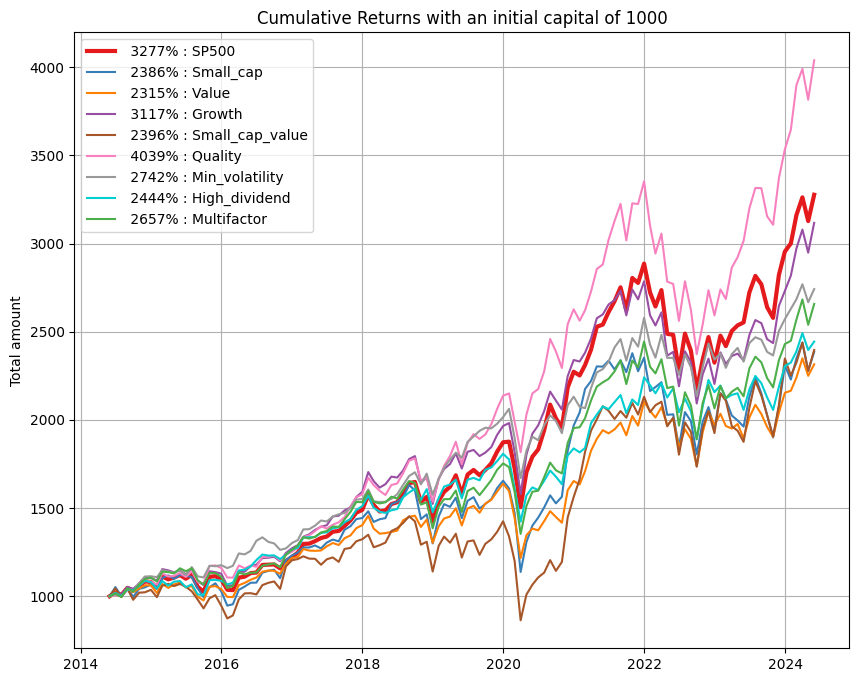

In [ ]:
# look the cumulative return starting at the same price thanks to Laspeyres indexing

# hypotetical initial investment
initial_capital = 1000

# indexing
data = (data / data.iloc[0])*initial_capital

# list of colors
colors = ['#E41A1C', '#377EB8', '#FF7F00', '#984EA3', '#A65628', '#F781BF', '#999999', '#00CED1', '#4DAF4A']

# plot the cumulative returns of each indexes
plt.figure(figsize=(10,8))
for i, ticker in enumerate(data.columns):
  label = f"{data[ticker].iloc[-1]:5.0f}% : {ticker}"
  if ticker == benchmark:
    plt.plot(data.index, data[ticker], color=colors[i], label=label, linewidth=3)
  else:
    plt.plot(data.index, data[ticker], color=colors[i], label=label)
plt.title("Cumulative Returns with an initial capital of "+str(initial_capital))
plt.ylabel("Total amount")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# calculate returns
returns = data.pct_change(1)
returns.dropna(inplace=True)
returns.head()

SP500  Small_cap     Value    Growth  Small_cap_value  \
Date                                                                   
2014-06-30  0.021425   0.051763  0.021208  0.018074         0.044252   
2014-07-31 -0.014068  -0.050430 -0.017118 -0.007110        -0.046805   
2014-08-31  0.040136   0.051854  0.035028  0.041406         0.047911   
2014-09-30 -0.015622  -0.052504 -0.014948 -0.010379        -0.060800   
2014-10-31  0.024133   0.046525  0.019763  0.029061         0.041267   

             Quality  Min_volatility  High_dividend  Multifactor  
Date                                                              
2014-06-30  0.006026        0.013126       0.017654     0.013713  
2014-07-31 -0.008051       -0.015152      -0.016182    -0.017665  
2014-08-31  0.045217        0.040679       0.037995     0.050383  
2014-09-30 -0.010350       -0.007612      -0.005869    -0.019189  
2014-10-31  0.028826        0.043032       0.024087     0.038458

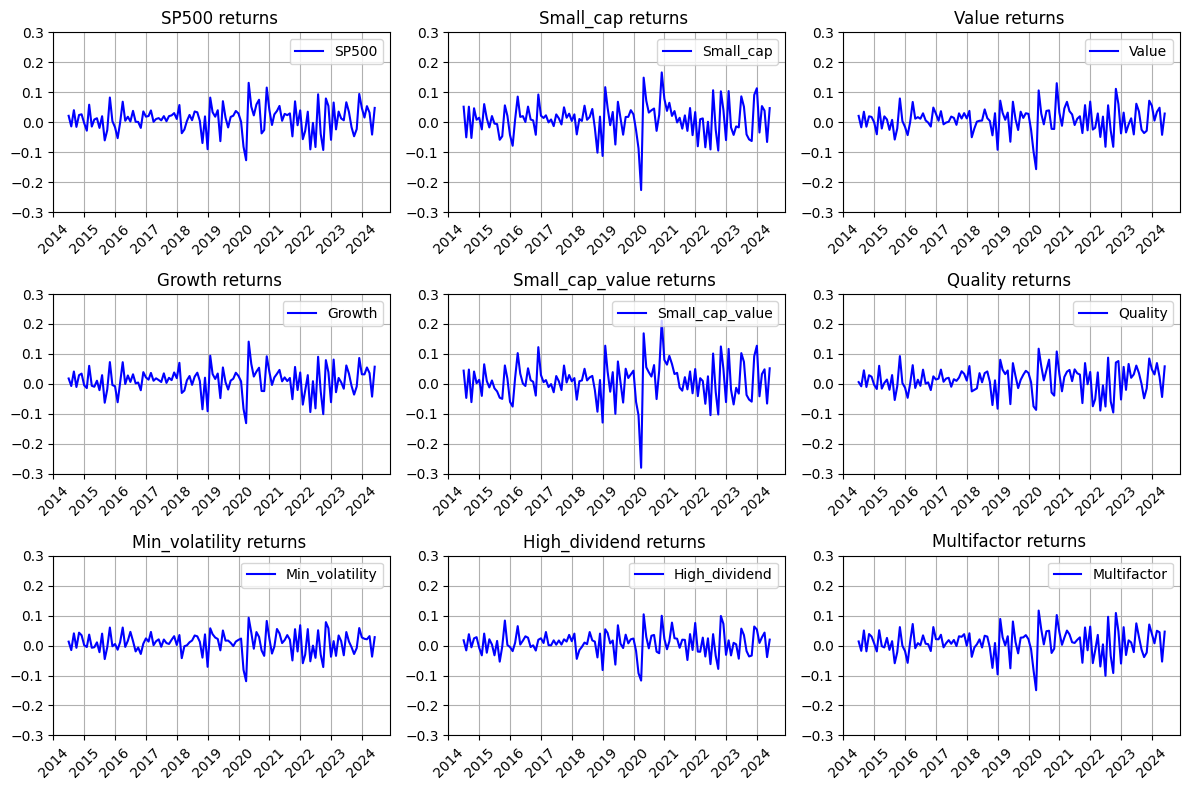

In [ ]:
# plotting returns
plt.figure(figsize=(12,8))
for i,ticker in enumerate(assets):
  plt.subplot(3,3,i+1)
  plt.plot(returns[ticker],color="blue",label=ticker)
  plt.legend(loc="upper right")
  plt.title(ticker + " returns ")
  plt.ylim(-0.3,0.3)
  plt.xticks(rotation=45)
  plt.grid()
plt.tight_layout()
plt.show()

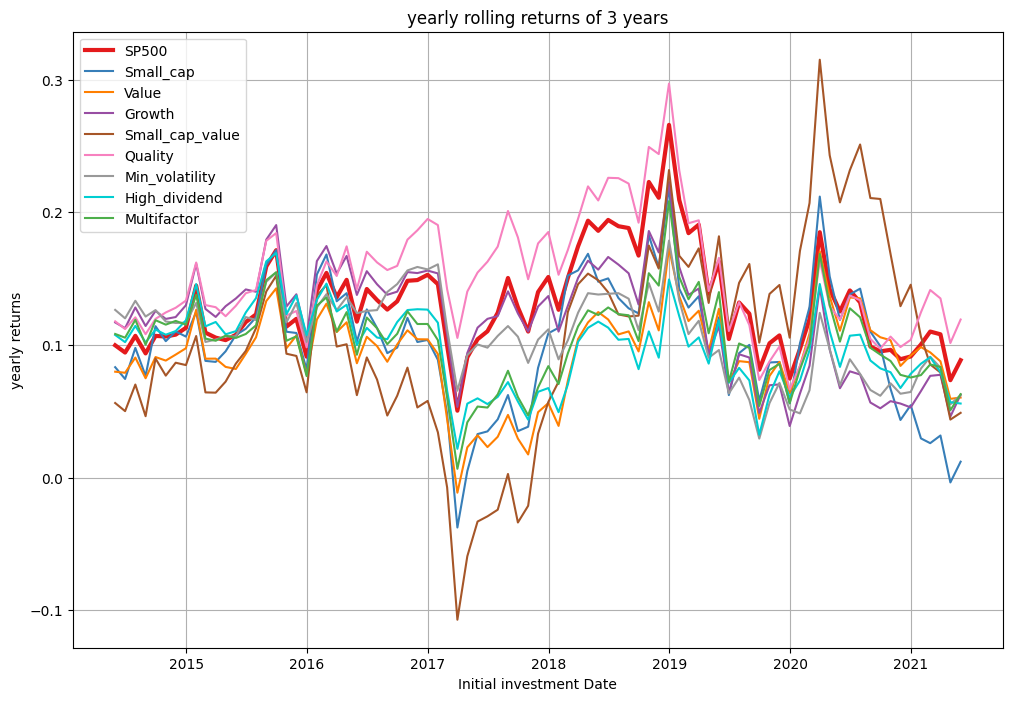

In [ ]:
#rolling returns

# periods of rolling
periods = 36
n_months = 12

# rolling
rolling_returns = (data.shift(-periods)/data)**(n_months/periods) - 1
rolling_returns = rolling_returns.dropna()

# plotting the results
plt.figure(figsize=(12,8))

for i, col in enumerate(rolling_returns.columns):
  if col == benchmark:
    plt.plot(rolling_returns.index, rolling_returns[col], color=colors[i % len(colors)], label=col, linewidth=3)
  else:
    plt.plot(rolling_returns.index, rolling_returns[col], color=colors[i % len(colors)], label=col)
plt.legend(rolling_returns.columns, loc='upper left')
plt.title("yearly rolling returns of "+ str(int(periods/12))+" years")
plt.ylabel("yearly returns")
plt.xlabel("Initial investment Date")
plt.grid()


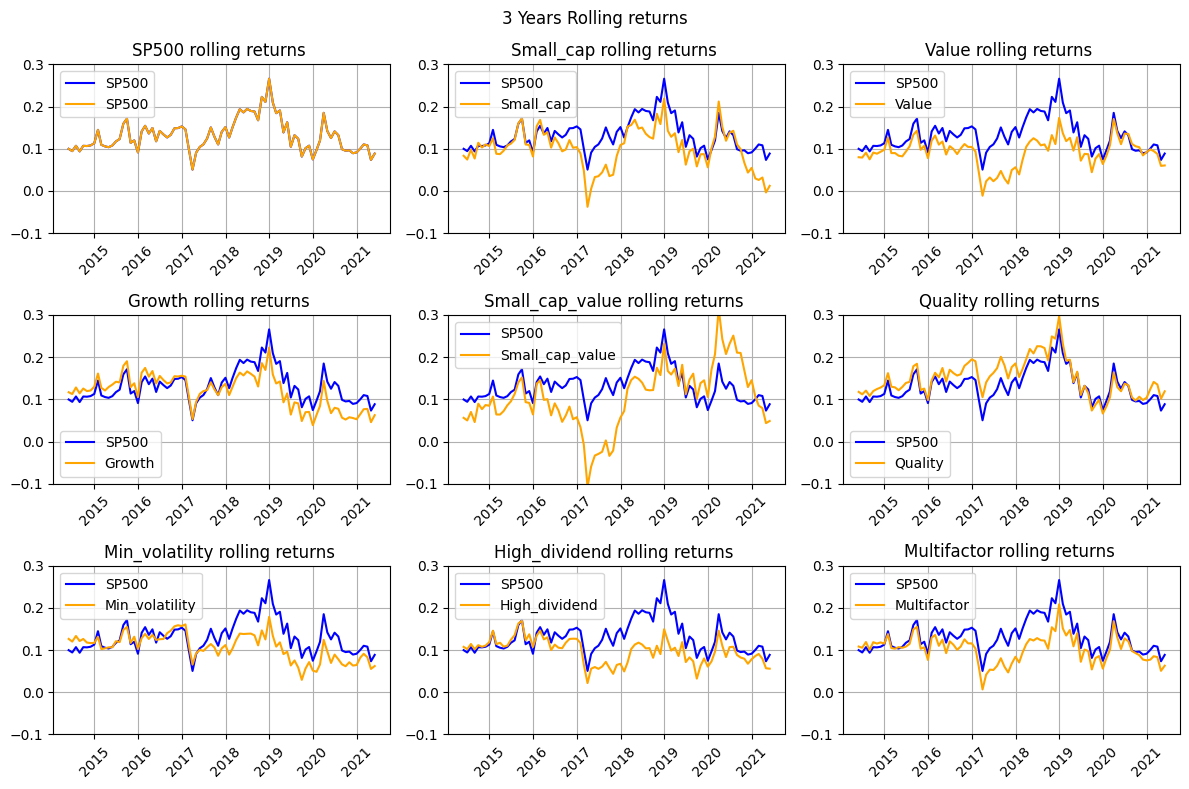

In [ ]:
# rolling return compared to the benchmark for a clear understanding
plt.figure(figsize=(12,8))
for i,ticker in enumerate(assets):
  plt.subplot(3,3,i+1)
  plt.plot(rolling_returns[benchmark],color="blue")
  plt.plot(rolling_returns[ticker],color="orange")
  plt.legend([benchmark, ticker])
  plt.title(ticker + " rolling returns ")
  plt.ylim(-0.1,0.3)
  plt.xticks(rotation=45)
  plt.grid()
plt.suptitle(str(int(periods/12))+" Years Rolling returns")
plt.tight_layout()
plt.show()

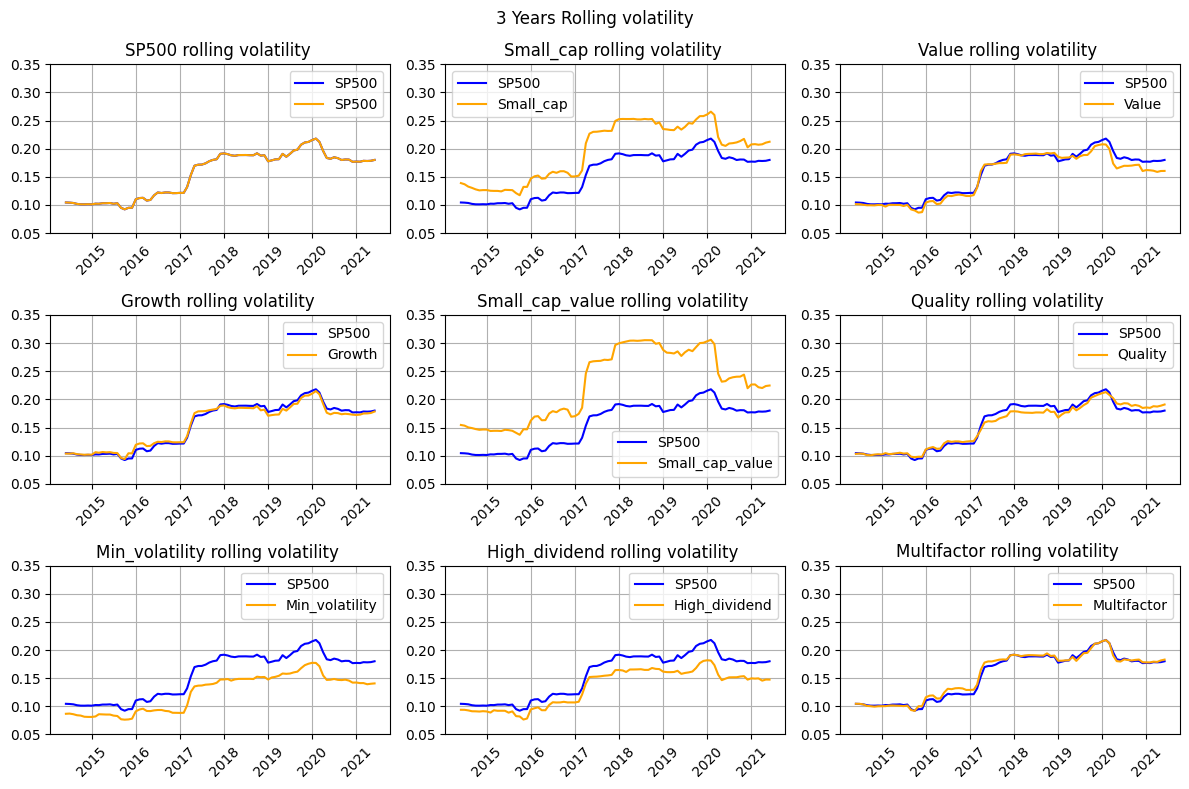

In [ ]:
# rolling volatility compared to the benchmark for a clear understanding

rolling_volatility = returns.rolling(periods).std()*np.sqrt(n_months)
rolling_volatility.dropna(inplace=True)

# fix the time period: look at the rolling standard deviation based on the start of an investment
rolling_volatility.set_index(rolling_returns.index,inplace=True)

plt.figure(figsize=(12,8))
for i,ticker in enumerate(assets):
  plt.subplot(3,3,i+1)
  plt.plot(rolling_volatility[benchmark],color="blue")
  plt.plot(rolling_volatility[ticker],color="orange")
  plt.legend([benchmark, ticker])
  plt.title(ticker + " rolling volatility ")
  plt.ylim(0.05,0.35)
  plt.xticks(rotation=45)
  plt.grid()
plt.suptitle(str(int(periods/12))+" Years Rolling volatility")
plt.tight_layout()
plt.show()

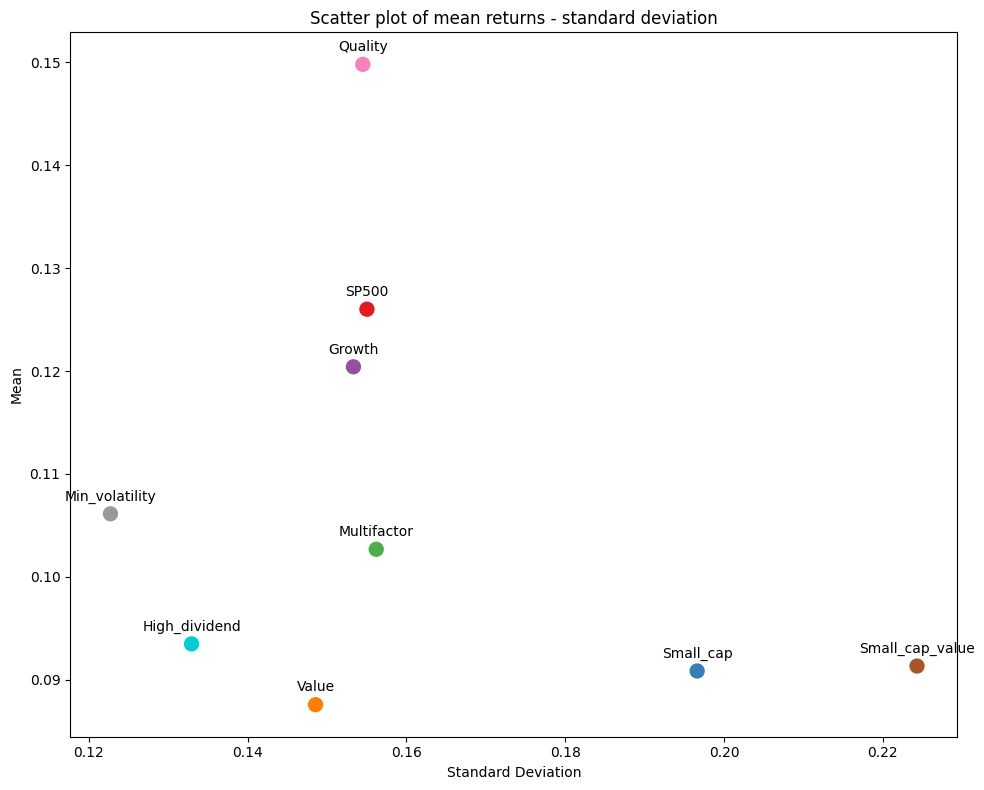

In [ ]:
# scatter plot of standard deviation and mean

# calculate annual mean and std
mean_returns  = np.prod(1 + returns,axis=0) ** (n_months / len(returns)) - 1
std_returns = returns.std()*np.sqrt(n_months)

# plotting the scatter plot
plt.figure(figsize=(10,8))
plt.scatter(std_returns,mean_returns,s=100,color=colors)
for ticker, x, y in zip(mean_returns.index,  std_returns, mean_returns):
  plt.text(x, y+0.001, ticker, fontsize=10, ha='center', va='bottom')
plt.xlabel("Standard Deviation")
plt.ylabel("Mean")
plt.title("Scatter plot of mean returns - standard deviation")
plt.tight_layout()
plt.show()

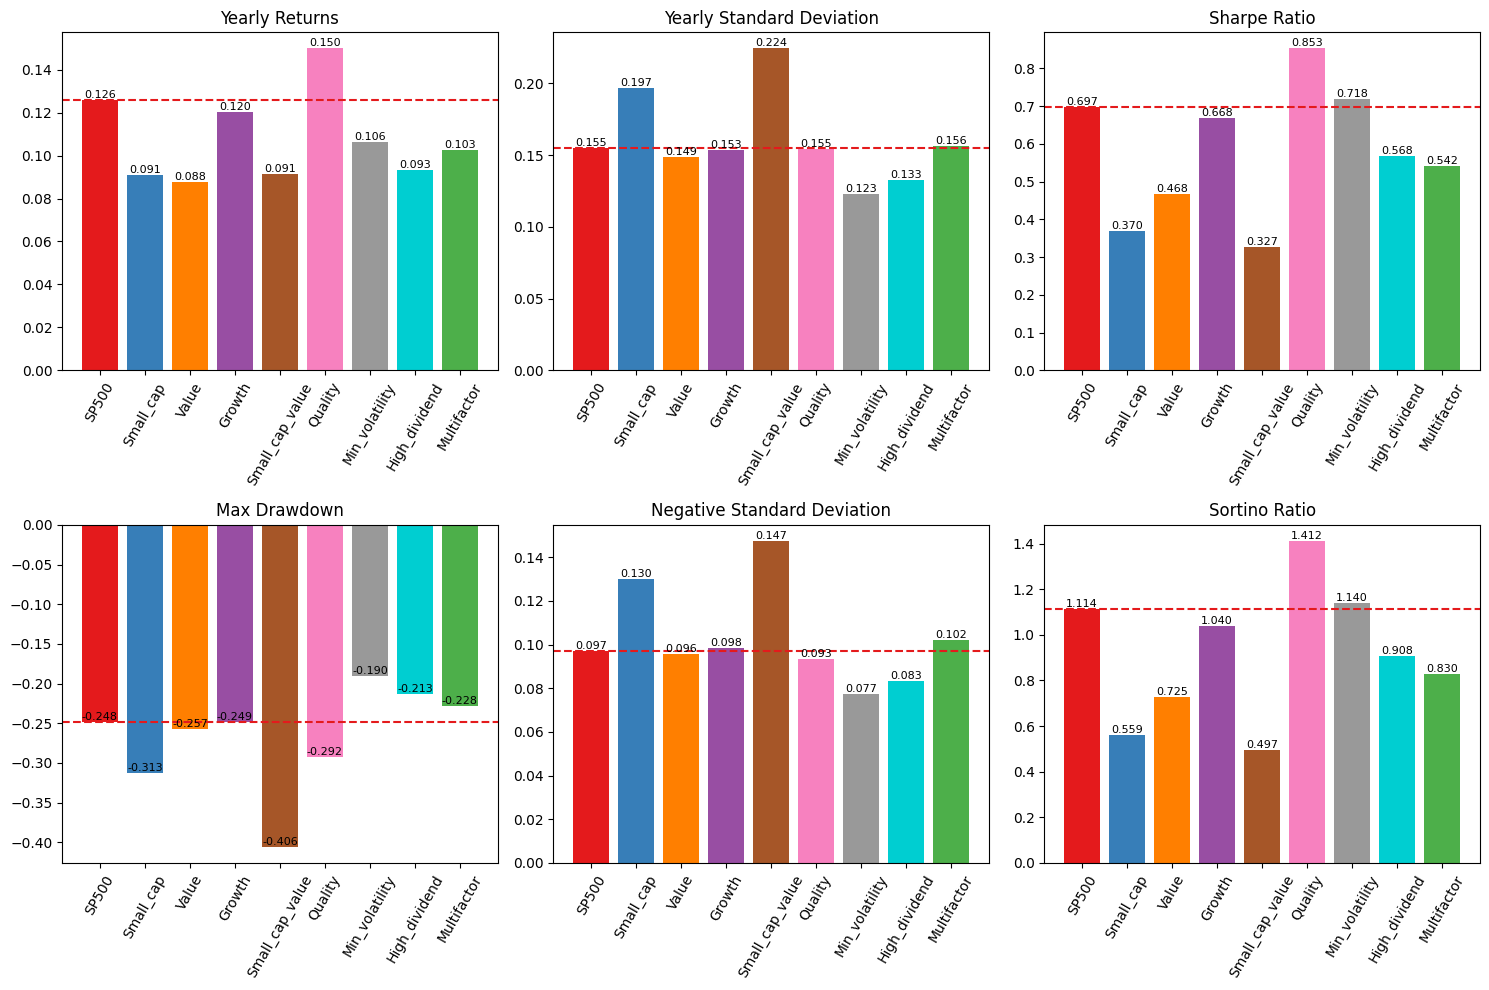

In [ ]:
# look the metrics of each index for a clear comparation
plt.figure(figsize=(15,10))

# mean
plt.subplot(2,3,1)
bars = plt.bar(mean_returns.index, mean_returns, color=colors)
plt.xticks(rotation=60)
plt.title("Yearly Returns")

# use a line to understand the difference from the benchmark and the other assets
plt.axhline(mean_returns[benchmark],color='#E41A1C', linestyle="--")

# get the results above the bar
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height,
            f"{height:.3f}", ha='center', va='bottom', fontsize=8)

# std
plt.subplot(2,3,2)
bars = plt.bar(std_returns.index, std_returns, color=colors)
plt.xticks(rotation=60)
plt.title("Yearly Standard Deviation")
plt.axhline(std_returns[benchmark],color='#E41A1C', linestyle="--")
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height:.3f}", ha='center', va='bottom', fontsize=8)

# sharpe
plt.subplot(2,3,3)
rf = 0.018
sharpe = (mean_returns - rf) / std_returns
bars = plt.bar(std_returns.index, sharpe, color=colors)
plt.xticks(rotation=60)
plt.title("Sharpe Ratio")
plt.axhline(sharpe[0],color='#E41A1C', linestyle="--")
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height:.3f}", ha='center', va='bottom', fontsize=8)

# max drawdown
max_dd = []
for i in assets:
  peak = np.maximum.accumulate(data[i])
  dd = (data[i] - peak) / peak
  max_dd.append(dd.min())

plt.subplot(2,3,4)
bars = plt.bar(std_returns.index, max_dd, color=colors)
plt.xticks(rotation=60)
plt.title("Max Drawdown")
plt.axhline(max_dd[0],color='#E41A1C', linestyle="--")
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height:.3f}", ha='center', va='bottom', fontsize=8)

# negative std
downside = []
for i in assets:
    downside.append(float(np.sqrt(np.mean((np.minimum(returns[i], 0))**2) * n_months)))

plt.subplot(2,3,5)
bars = plt.bar(std_returns.index, downside, color=colors)
plt.xticks(rotation=60)
plt.title("Negative Standard Deviation")
plt.axhline(downside[0],color='#E41A1C', linestyle="--")
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height:.3f}", ha='center', va='bottom', fontsize=8)

# sortino ratio
sortino = (mean_returns - rf) / downside
plt.subplot(2,3,6)
bars = plt.bar(std_returns.index, sortino, color=colors)
plt.xticks(rotation=60)
plt.title("Sortino Ratio")
plt.axhline(sortino[0],color='#E41A1C', linestyle="--")
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height:.3f}", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


In [ ]:
# histogram of returns with VAR at 95% and 99%

Var_95 = []   #in 95% of cases it does not fall below this level
Var_99 = []

# Calculate VaR as monthly returns for have a better estimate
for ticker in assets:
    ret = returns[ticker]

    # calculate monthly VaR
    Var_95.append(ret.quantile(0.05))
    Var_99.append(ret.quantile(0.01))

# distribution metrics
distribution_met = pd.DataFrame()
distribution_met["skewness"] = returns.skew()
distribution_met["kurtosis"] = returns.kurtosis() + 3 #default kurtosis= 0 is normal distributed
distribution_met["VaR_95"] = Var_95
distribution_met["VaR_99"] = Var_99
distribution_met.head(9)

skewness  kurtosis    VaR_95    VaR_99
SP500           -0.352333  3.610154 -0.070032 -0.092347
Small_cap       -0.443651  5.016497 -0.083803 -0.110446
Value           -0.394940  4.668458 -0.058268 -0.095989
Growth          -0.467425  4.058671 -0.081798 -0.099646
Small_cap_value -0.431921  6.040950 -0.093168 -0.124451
Quality         -0.359527  2.903684 -0.074687 -0.088604
Min_volatility  -0.555170  3.898928 -0.049865 -0.079280
High_dividend   -0.262846  3.903461 -0.054110 -0.090338
Multifactor     -0.511860  4.001555 -0.074657 -0.100011

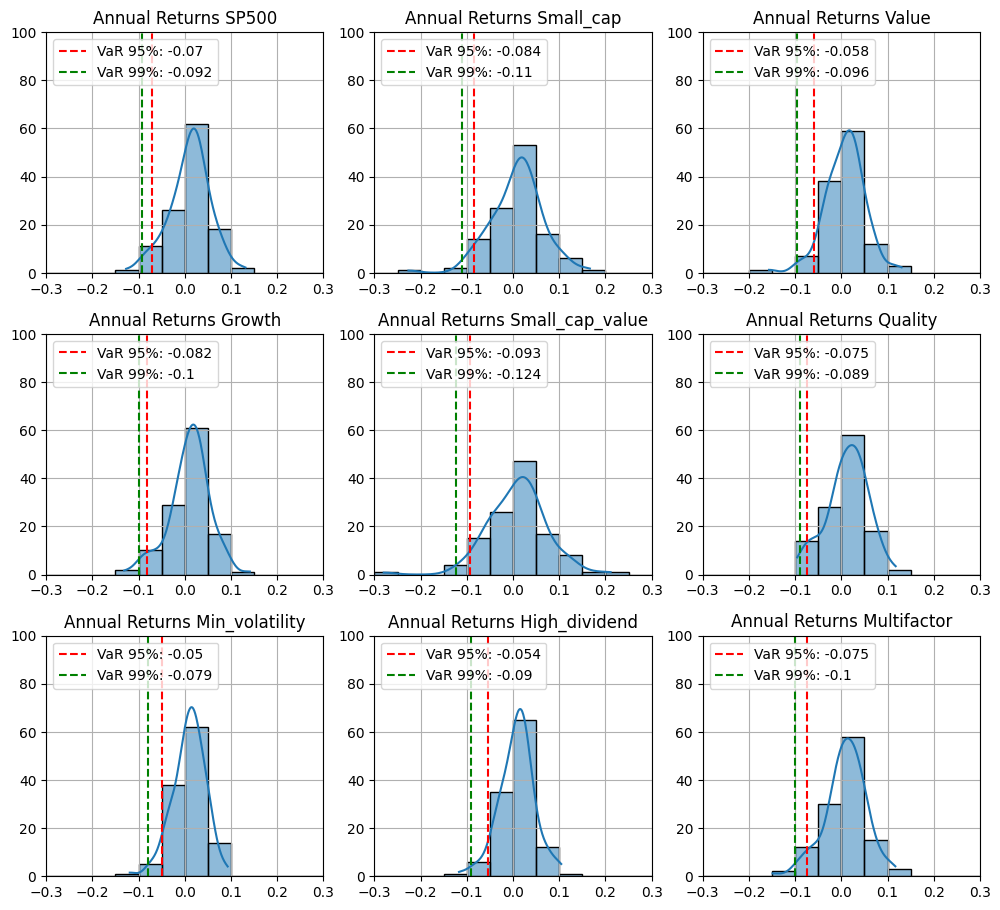

In [ ]:
# plotting histogram of returns with kernel density
bins = np.arange(-0.30,0.31,0.05)
plt.figure(figsize=(10,15))
for i, ticker in enumerate(assets):
  plt.subplot(5,3,i+1)
  sns.histplot(returns[ticker],bins=bins,kde=True)
  plt.axvline(Var_95[i], color='red', linestyle='--', label='VaR 95%: '+str(np.round(Var_95[i],3)))
  plt.axvline(Var_99[i], color='green', linestyle='--', label='VaR 99%: '+str(np.round(Var_99[i],3)))
  plt.title('Annual Returns ' + ticker)
  plt.ylim(0, 100)     # use the same limit for a clear data visualization
  plt.xlim(-0.3,0.3)
  plt.legend(loc = "upper left")
  plt.xlabel("")
  plt.ylabel("")
  plt.grid()
plt.tight_layout()
plt.show()

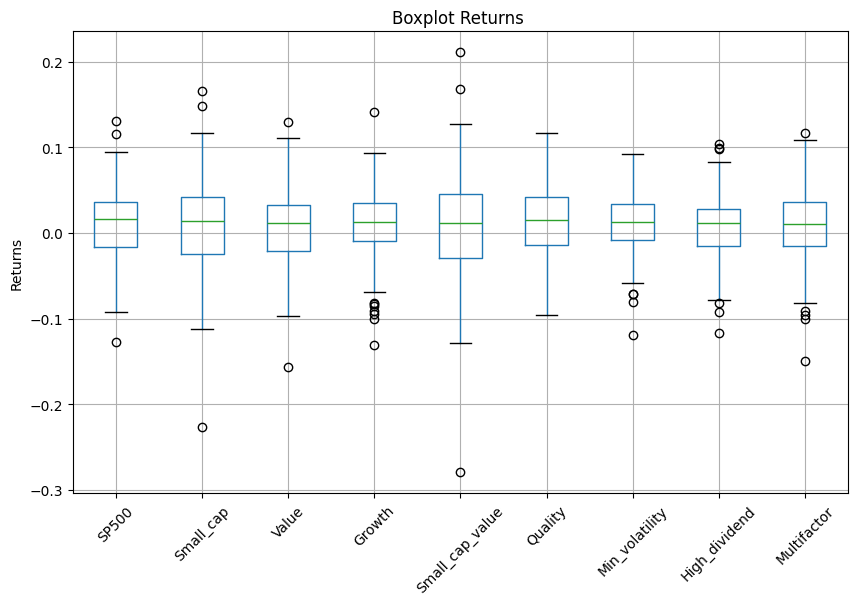

In [ ]:
# boxplot
plt.figure(figsize=(10,6))
returns.boxplot()
plt.title("Boxplot Returns ")
plt.ylabel("Returns")
plt.xticks(rotation=45)
plt.show()

<Axes: >

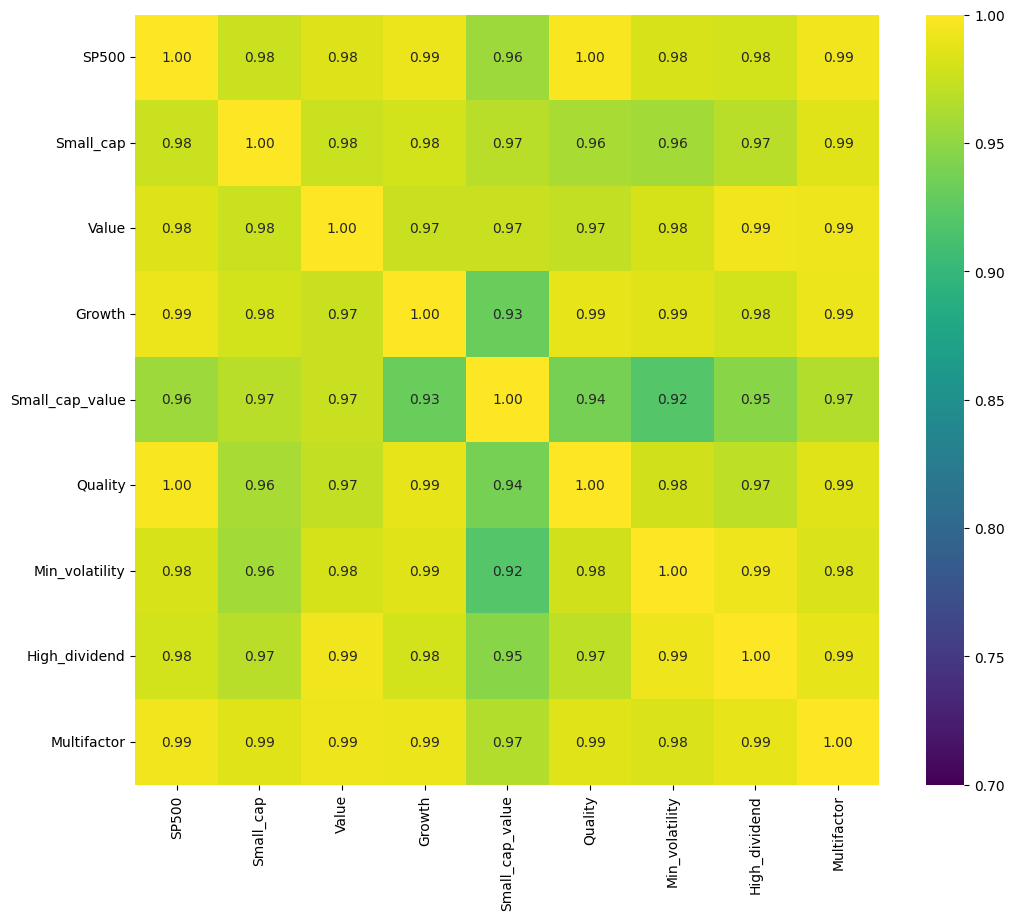

In [ ]:
# heatmap of price correlation
price_corr = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(price_corr,cmap="viridis",vmin=0.70,vmax=1,annot=True,fmt=".2f")  #use a vmin=0.70 otherwise it's all yellow

<Axes: >

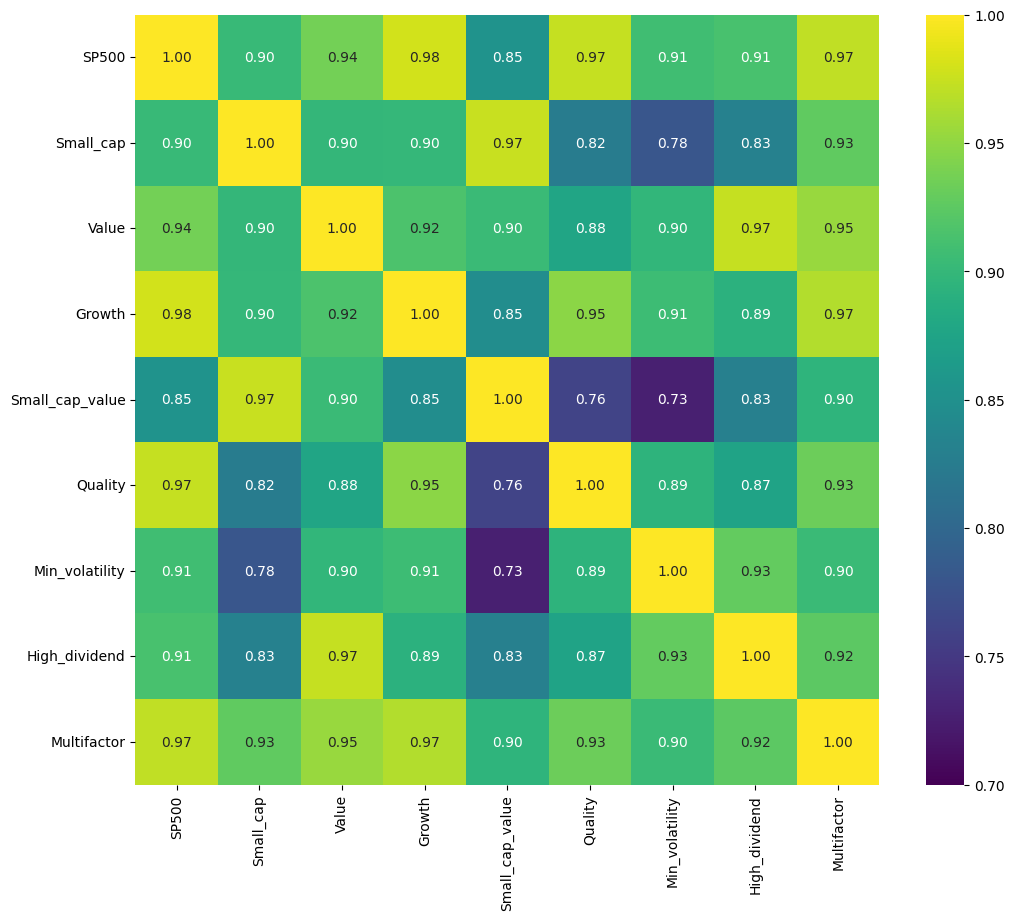

In [ ]:
## heatmap of returns correlation
ret_corr = returns.corr()
plt.figure(figsize=(12,10))
sns.heatmap(ret_corr,cmap="viridis",vmin=0.70,vmax=1,annot=True,fmt=".2f")

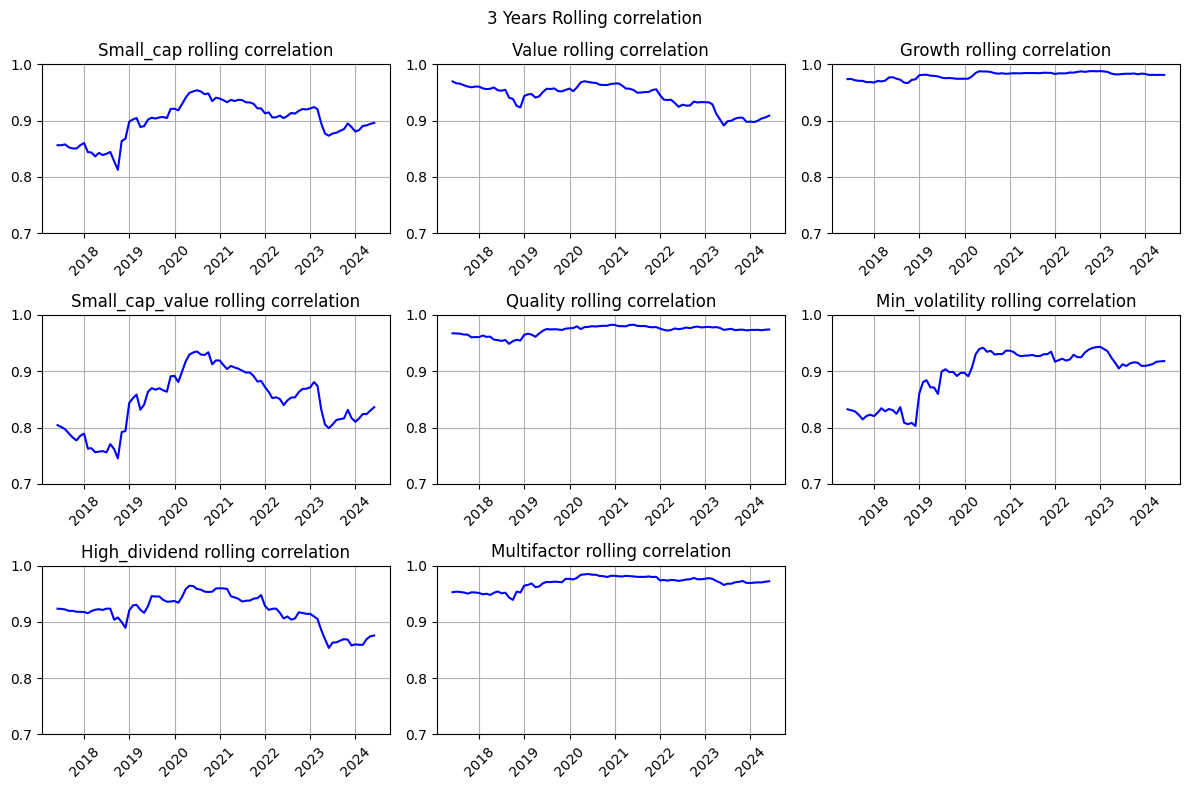

In [ ]:
# rolling correlation between assets and benchmark
periods = 36

# skip the benchmark
assets_to_plot = [t for t in assets if t != benchmark]

plt.figure(figsize=(12,8))
for i, ticker in enumerate(assets_to_plot):
    if ticker == benchmark:  # skip if ticker is benchmark
        continue
    # correlation between bechmark and other assets
    rolling_ret_corr = returns[benchmark].rolling(periods).corr(returns[ticker])
    rolling_ret_corr.dropna(inplace = True)

    # plot chart
    plt.subplot(3,3,i+1)
    plt.plot(rolling_ret_corr, color="blue")
    plt.title(ticker + " rolling correlation")
    plt.xticks(rotation=45)
    plt.ylim(0.7,1)
    plt.grid()

plt.suptitle(f"{int(periods/12)} Years Rolling correlation")
plt.tight_layout()
plt.show()

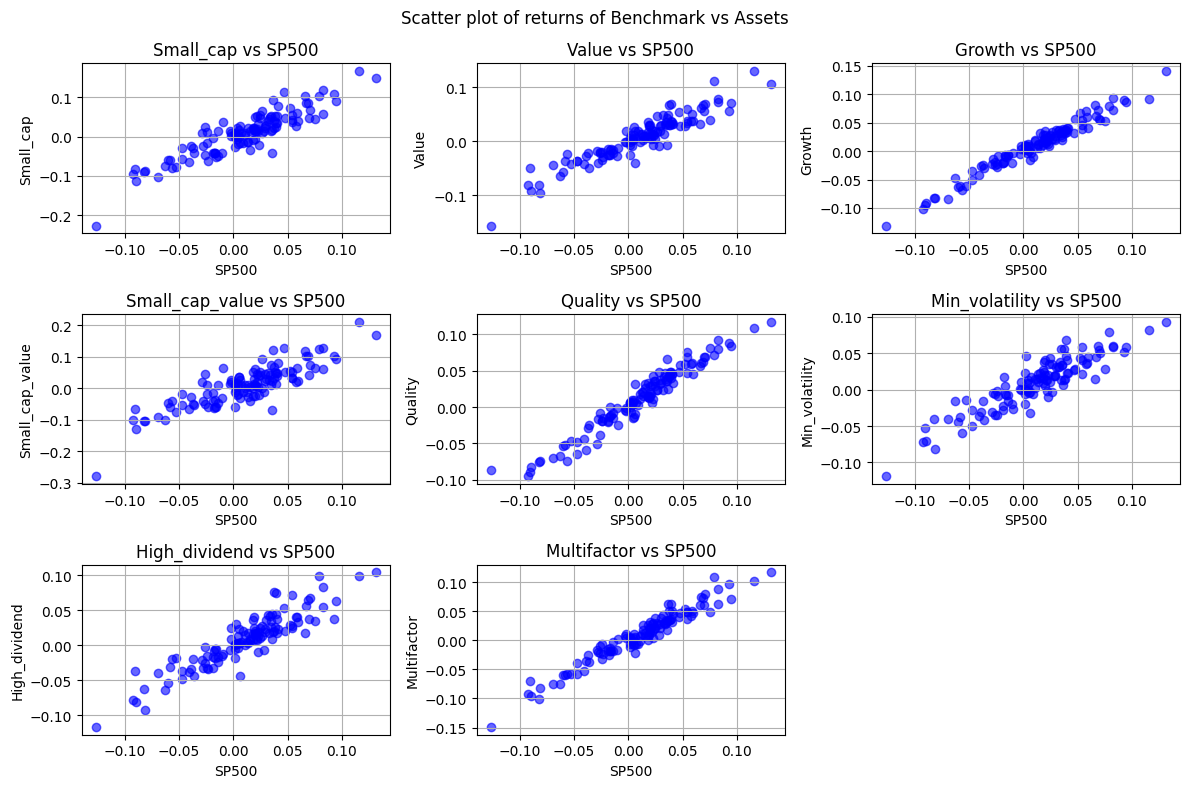

In [ ]:
# scatter plot between assets and benchmark

plt.figure(figsize=(12,8))
for i, ticker in enumerate(assets_to_plot):
    plt.subplot(3,3,i+1)
    plt.scatter(returns[benchmark], returns[ticker], color="blue", alpha=0.6)
    plt.xlabel(benchmark)
    plt.ylabel(ticker)
    plt.title(f"{ticker} vs {benchmark}")
    plt.grid()

plt.suptitle("Scatter plot of returns of Benchmark vs Assets")
plt.tight_layout()
plt.show()

In [ ]:
#upload fama-french csv
upload = files.upload()

Saving F-F_Research_Data_5_Factors.csv to F-F_Research_Data_5_Factors (3).csv


In [ ]:
#download the fama french data csv
ff_data = pd.read_csv("F-F_Research_Data_5_Factors.csv")
ff_data.columns = ["Date","Mkt",	"SMB",	"HML",	"RMW",	"CMA",	"RF"]

#set the correct format of date
ff_data["Date"] = pd.to_datetime(ff_data["Date"], format="%Y%m").dt.strftime("%Y-%m")
ff_data.set_index("Date",inplace=True)

# use the decimal number and not the percentage
ff_data = ff_data.div(100)

#save the risk free rate data
risk_free = ff_data["RF"]
ff_data.drop("RF",axis=1,inplace=True)
ff_data.head()

Mkt     SMB     HML     RMW     CMA
Date                                           
1963-07 -0.0039 -0.0048 -0.0081  0.0064 -0.0115
1963-08  0.0508 -0.0080  0.0170  0.0040 -0.0038
1963-09 -0.0157 -0.0043  0.0000 -0.0078  0.0015
1963-10  0.0254 -0.0134 -0.0004  0.0279 -0.0225
1963-11 -0.0086 -0.0085  0.0173 -0.0043  0.0227

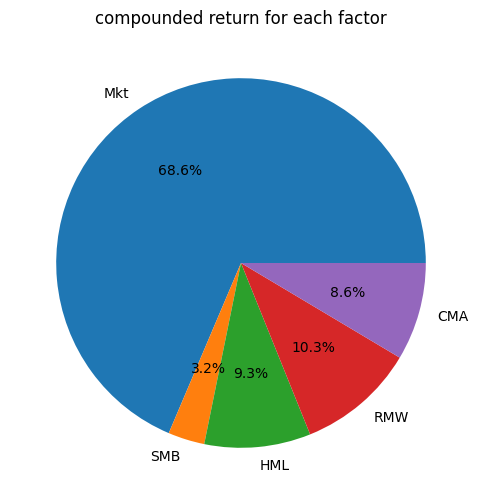

In [ ]:
# compuded return for each factor: how much every factor explained the returns
compund_returns = (1 + ff_data).prod() -1

plt.figure(figsize=(8,6))
plt.pie(compund_returns, labels =compund_returns.index,autopct = "%1.1f%%")
plt.title("compounded return for each factor")
plt.show()

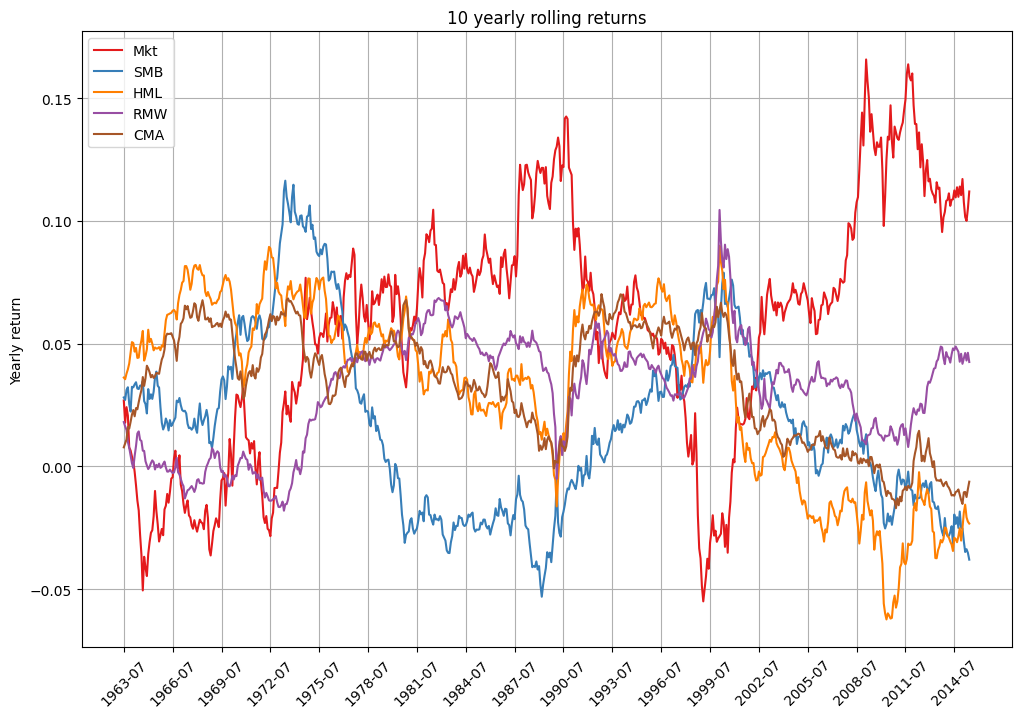

In [ ]:
# rolling return based on benchmark

#set a period
periods = 120

# ricostruisci i prezzi da rendimenti
prices = (1 + ff_data).cumprod()

# calcolo rolling CAGR
ff_rolling_ret = (prices.shift(-periods) / prices)**(n_months/periods) - 1
ff_rolling_ret = ff_rolling_ret.dropna()

# plotting the results
plt.figure(figsize=(12,8))
for i, col in enumerate(ff_rolling_ret.columns):
  plt.plot(ff_rolling_ret[col], color=colors[i % len(colors)], label=col)
plt.legend(ff_rolling_ret.columns, loc='upper left')
plt.title(str(int(periods/12))+" yearly rolling returns")
plt.xticks(ff_rolling_ret.index[::36], rotation=45)
plt.ylabel("Yearly return")
plt.grid()
plt.show()

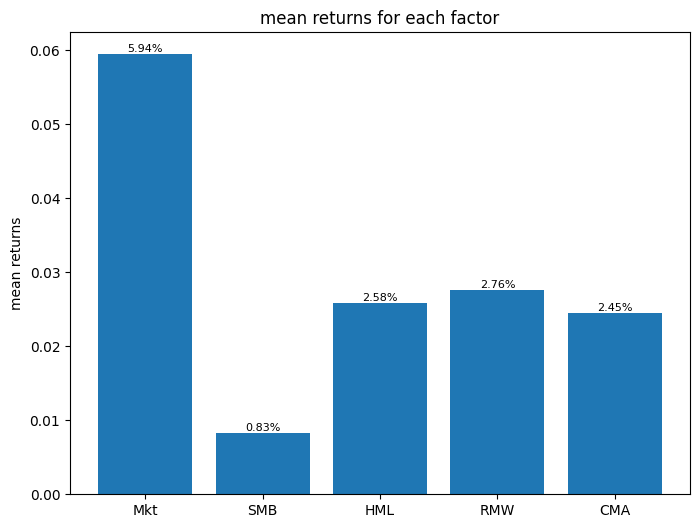

In [ ]:
# returns for each value
mean = compund_returns**(n_months/len(ff_data))-1
mean.head()
plt.figure(figsize=(8,6))
bars = plt.bar(mean.index,mean)
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height:.2%}", ha="center", va="bottom", fontsize=8)
plt.title("mean returns for each factor")
plt.ylabel("mean returns")
plt.show()

In [ ]:
# change the format of the returns
returns.index = pd.to_datetime(returns.index).strftime("%Y-%m")

In [ ]:
# understand the risk free rate mean to use for calculate the sharpe ratio and sortino
risk_free = risk_free.loc[returns.index[0]:]
RF = np.prod((1+risk_free),axis=0)**(n_months/len(risk_free))-1
print("mean risk free rate : ",RF)

mean risk free rate :  0.017125431158849347


In [ ]:
# starting at the same period of returns
ff_data = ff_data.loc[returns.index[0]:]

In [ ]:
# using the automatic linear regression using the library stat models

# create a data frame with the factors
fact_list = ["intercept","beta","SMB","HML","RMW","CMA"]
factors = pd.DataFrame(index = fact_list )

# calculate the coefficient
for i in assets:
  ff_data[i] = returns[i] - risk_free
  formula = f"{i} ~ Mkt + SMB + HML + RMW + CMA"
  ff_model = smf.ols(formula=formula, data=ff_data).fit()
  factors[i] = ff_model.params.values

factors.head(6)

SP500  Small_cap     Value    Growth  Small_cap_value   Quality  \
intercept -0.000162  -0.000563 -0.001719 -0.000137        -0.000524  0.000911   
beta       0.996077   1.007115  0.904120  0.955237         1.074164  0.965156   
SMB       -0.089239   0.654908 -0.056384 -0.041175         0.799764 -0.133716   
HML       -0.007193   0.132111  0.250855 -0.022640         0.403535 -0.142914   
RMW        0.042149  -0.038387  0.076072  0.031203         0.133333  0.197939   
CMA        0.019304  -0.072113  0.181160 -0.014099        -0.005886 -0.011083   

           Min_volatility  High_dividend  Multifactor  
intercept       -0.000521      -0.001377    -0.001528  
beta             0.746183       0.812773     0.949828  
SMB             -0.129289      -0.102204     0.074005  
HML             -0.120878       0.090100     0.064841  
RMW              0.241280       0.208503     0.173079  
CMA              0.258722       0.334740     0.063402

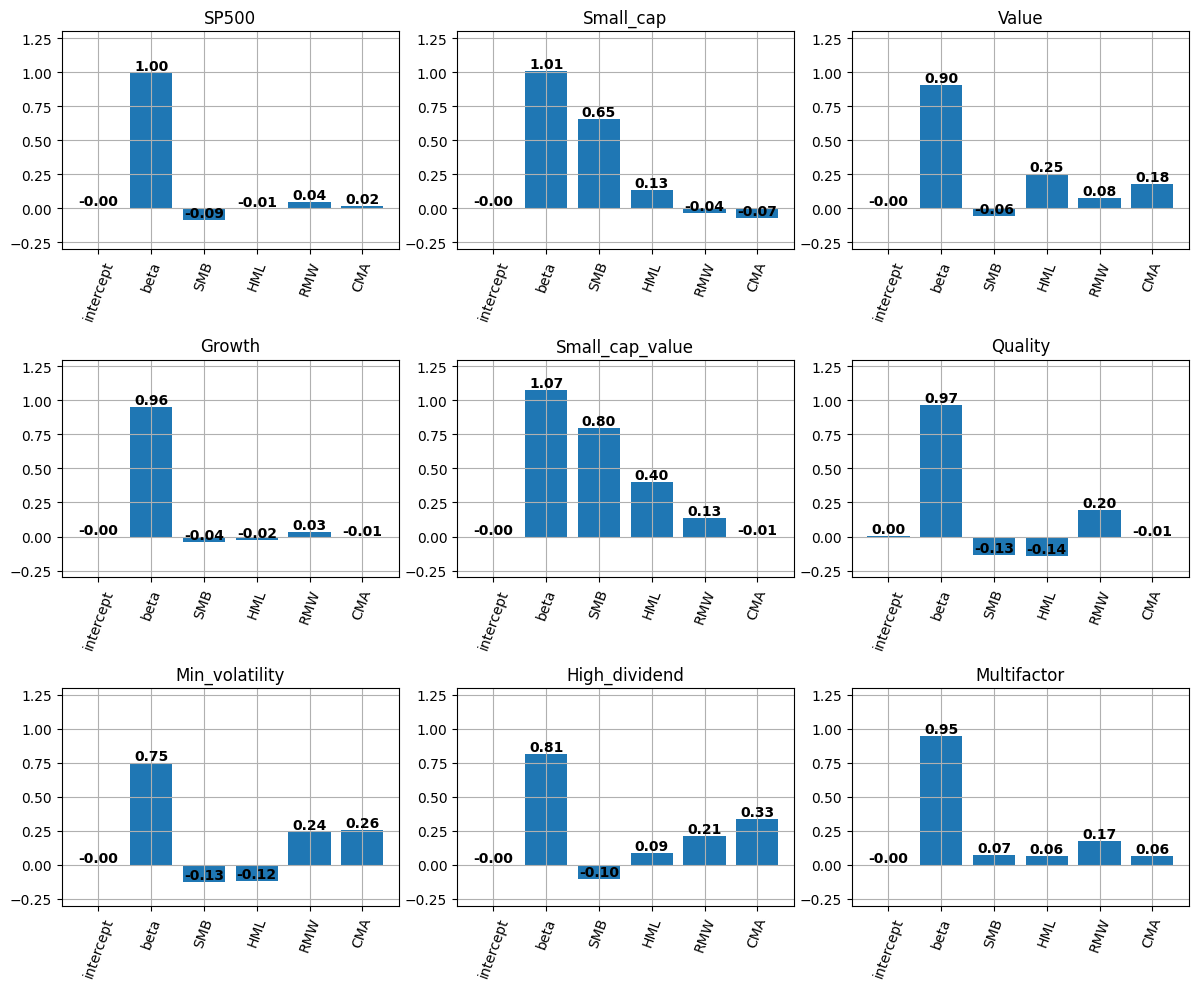

In [ ]:
# plotting the result of each index
plt.figure(figsize=(12,10))

for n,i in enumerate(assets):
  plt.subplot(3,3,n+1)
  bars = plt.bar(fact_list,factors[i])
  for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height:.2f}", ha="center", va="bottom", fontsize=10,weight="bold")
  plt.xticks(rotation=70)
  plt.title(i)
  plt.ylim(-0.3,1.3)
  plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
# Time series forecasting using Monte Carlo simulation to predict the market return

# mantained the same random data
seed(1)

# calculate the monthly ret and std
ret = (1+mean_returns[benchmark])**(1/12)-1
std = std_returns[benchmark]/np.sqrt(12)

# number of simulation
n = 1000

# period of time do you want to predict (monthly unit)
T = 12

# create an array with T period to predict and n different simulation
Port = np.zeros((T+1, n))

# Starting the first data with the last price based on the portfolio you want
Last_price = data[benchmark].iloc[-1]
Port[0] = Last_price

# 1 methods using normal distribution
for t in range(1, T+1):
    Port[t] = Port[t-1]*(1+ (ret + std*np.random.randn(n)))

# future date
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1),periods=T,freq='ME')

# create a data frame
Port_df = pd.DataFrame(data=Port[1:],index = future_dates,columns=[f'Sim_{i}' for i in range(n)])

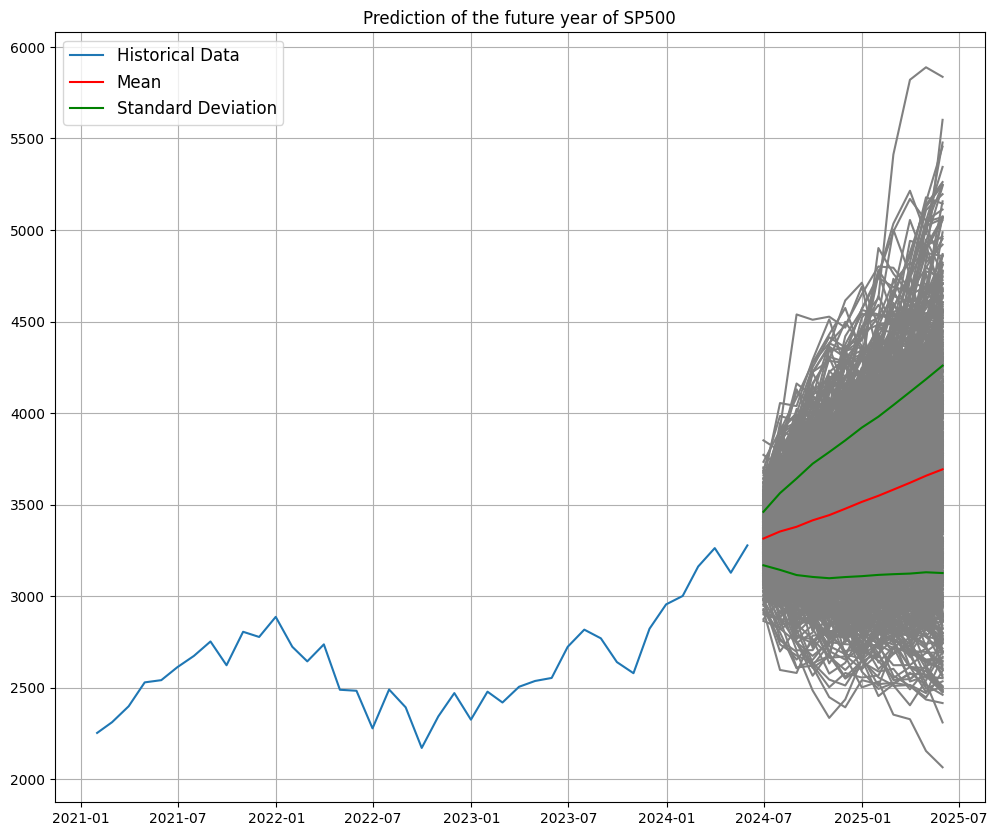

In [ ]:
# plotting the historicaal data with the prediction
plt.figure(figsize=(12,10))

# using 2/3 of the historical data for a better data visualization
plt.plot(data[benchmark].iloc[int(len(data)*(2/3)):], label = "Historical Data")
plt.plot(Port_df.index,Port_df,color='gray')

# mean and std of the prediction
plt.plot(Port_df.index,Port_df.mean(axis=1), color='red', label ="Mean")
plt.plot(Port_df.index,Port_df.mean(axis=1)+Port_df.std(axis=1), color='green', label ="Standard Deviation")
plt.plot(Port_df.index,Port_df.mean(axis=1)-Port_df.std(axis=1), color='green')

plt.title("Prediction of the future year of "+ benchmark)
plt.legend(fontsize=12)
plt.grid()
plt.show()

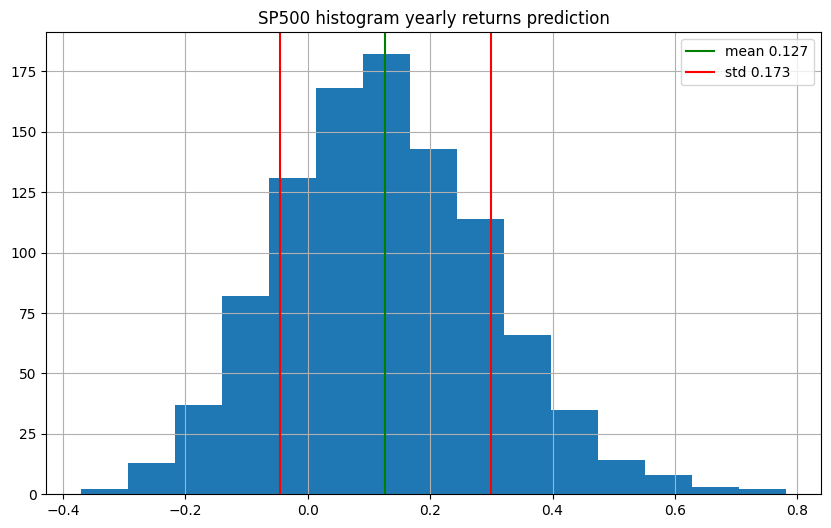

In [ ]:
# histogram of yearly returns forecasting

# metrics in the yearly unit
montec_returns = (Port[-1]/Last_price-1)
montec_returns = (1 + montec_returns) ** (n_months/T) - 1

# take the average and std of all the returns of n prediction
montec_ymean =  montec_returns.mean()
montec_ystd = montec_returns.std()

# plotting the histogram
plt.figure(figsize = (10,6))
plt.hist(montec_returns, bins = 15)
plt.axvline(montec_ymean,color="g")
plt.axvline(montec_ymean-montec_ystd,color="r")
plt.axvline(montec_ymean+montec_ystd,color="r")
plt.legend(["mean "+str(np.round(montec_ymean,3))
            ,"std "+str(np.round(montec_ystd,3))])
plt.title(benchmark+" histogram yearly returns prediction")
plt.grid()
plt.show()

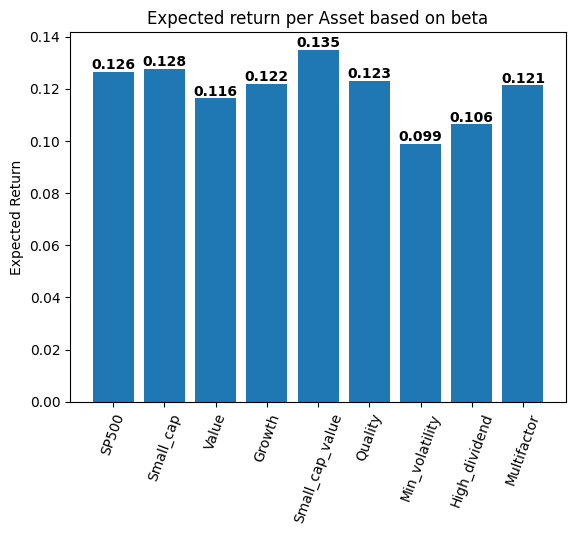

In [ ]:
# expected returns using beta

# cagr of market
expected_market_ret = montec_ymean

# expected ret for each assets
expected_ret = pd.DataFrame()
for i,ticker in enumerate(assets):
  expected_ret.loc["Expected_ret",ticker] = (RF + factors.loc["beta",ticker]*(expected_market_ret-RF))

#plotting chart
bars = plt.bar(assets, expected_ret.loc["Expected_ret"])
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height,
            f"{height:.3f}", ha="center", va="bottom", fontsize=10,weight="bold")

plt.xticks(rotation=70)
plt.ylabel("Expected Return")
plt.title("Expected return per Asset based on beta")
plt.show()

In [ ]:
print(assets)

['SP500', 'Small_cap', 'Value', 'Growth', 'Small_cap_value', 'Quality', 'Min_volatility', 'High_dividend', 'Multifactor']


In [ ]:
# random weights of all portfolio for the optimization

# optimization considering only 4 indexes

# drop the indexes not usefull
# assets need correct sorting as downloaded data
best_assets = ["SP500","Small_cap_value","Quality","Min_volatility"]
not_necessary = []
for i in assets:
  if i not in best_assets:
    not_necessary.append(i)

# calculte the return of the assets needed
optimal_returns = returns.copy()
optimal_returns.drop(columns=not_necessary,inplace=True)

# calculate cov and mean
cov= optimal_returns.cov()*n_months
mean_returns = np.prod((1+optimal_returns),axis=0)**(n_months/len(optimal_returns))-1

# prepare the list object
n_portf = 50000
portfolio_weights = []
portfolio_std = []
portfolio_returns = []
portfolio_sharpe = []

# ===considering a fixed weight for benchamark===

# set the weight of the benchmark
fixed_weight = 0.50
remaining_assets = len(best_assets) - 1

for i in range(n_portf):
  random_weights = np.random.random_sample(remaining_assets)
  random_weights /= random_weights.sum()
  random_weights = np.round(random_weights*(1 - fixed_weight),5)
  weights = np.insert(random_weights, 0, fixed_weight)

  portfolio_weights.append(weights)
  portfolio_returns.append(np.dot(mean_returns, weights))
  portfolio_std.append(np.sqrt(np.dot(weights.T, np.dot(cov, weights))))
  portfolio_sharpe.append((portfolio_returns[i] - RF) / portfolio_std[i])

portf = pd.DataFrame([portfolio_weights, portfolio_returns, portfolio_std, portfolio_sharpe],index=["weights", "returns", "std", "sharpe"]).T

# ===considering for a not  fixed weight for benchmark===
'''
for i in range(n_portf):
  weights = np.random.random_sample(4)
  weights = np.round(weights/sum(weights),3)
  portfolio_weights.append(weights)
  portfolio_returns.append(np.dot(mean_returns,weights))
  portfolio_std.append(np.sqrt(np.dot(weights.T,np.dot(cov,weights))))
  portfolio_sharpe.append((portfolio_returns[i]-RF)/portfolio_std[i])
portf = pd.DataFrame([portfolio_weights,portfolio_returns,portfolio_std,portfolio_sharpe],index = ["weights","returns","std","sharpe"]).T
'''


# ===considering all indexes===
'''
# Use the metrics of all the dataset
cov= returns.cov()*n_months
mean_returns = (1+returns.mean())**n_months-1

for i in range(n_portf):
  weights = np.random.random_sample(len(assets))
  weights = np.round(weights/sum(weights),3)
  portfolio_weights.append(weights)
  portfolio_returns.append(np.dot(mean_returns,weights))
  portfolio_std.append(np.sqrt(np.dot(weights.T,np.dot(cov,weights))))
  portfolio_sharpe.append((portfolio_returns[i]-RF)/portfolio_std[i])
portf = pd.DataFrame([portfolio_weights,portfolio_returns,portfolio_std,portfolio_sharpe],index = ["weights","returns","std","sharpe"]).T
best_assets = assets.copy()

portf.head()
'''

portf.head()

weights   returns       std    sharpe
0  [0.5, 0.19606, 0.08615, 0.21779]  0.116928  0.153835  0.648768
1  [0.5, 0.11726, 0.35166, 0.03108]  0.129697   0.15676  0.718111
2  [0.5, 0.14942, 0.13028, 0.22029]  0.119546  0.151215  0.677318
3  [0.5, 0.22518, 0.04405, 0.23077]  0.114658  0.155111  0.628792
4   [0.5, 0.3668, 0.09863, 0.03457]  0.114947  0.171323  0.570975

In [ ]:
# optimal portfolio using the efficient frontier

# optimal portfolio
max_ret = portf.sort_values(by="returns",ascending=False).iloc[0]
max_sharpe = portf.sort_values(by="sharpe",ascending=False).iloc[0]
min_vol = portf.sort_values(by="std").iloc[0]

# set 3 different interval
if max_ret["std"] == max_sharpe["std"]:
    # if max_ret portfolio is equal to the max_sharpe
    max_risk = max_sharpe["std"] - 0.005  #use this value to have a portfolio far away then the other
    min_risk = min_vol["std"]
else:
    # interval between the portofolio with max_ret and max_sharpe
    max_risk = max_ret["std"] - 0.005
    min_risk = max_sharpe["std"]

# 3 other portfolio where in 3 different interval i'll take the one with the max ret
efficient_portfolios = []

# iteration of the intervals
for i in range(len(risk_levels)-1):
  mask = (portf['std'] >= risk_levels[i]) & (portf['std'] < risk_levels[i+1])
  subset = portf[mask]
  if not subset.empty:
    max_return_idx = subset['returns'].idxmax()
    efficient_portfolios.append(portf.loc[max_return_idx])

# create the data frame with the best portfolios
efficient_portfolios.append(max_ret)
efficient_portfolios.append(max_sharpe)
efficient_portfolios.append(min_vol)
index = ["portf_1","portf_2","portf_3","max_ret","max_sharpe","min_vol"]
efficient_df = pd.DataFrame(efficient_portfolios,index=index)
efficient_df.drop(columns="weights",inplace=False).head(6)

returns       std    sharpe
portf_1     0.121865  0.140021  0.748028
portf_2     0.127262  0.144141  0.764089
portf_3     0.132301  0.148526  0.775457
max_ret     0.137657  0.153527  0.785083
max_sharpe  0.137657  0.153527  0.785083
min_vol     0.116159  0.135771  0.729410

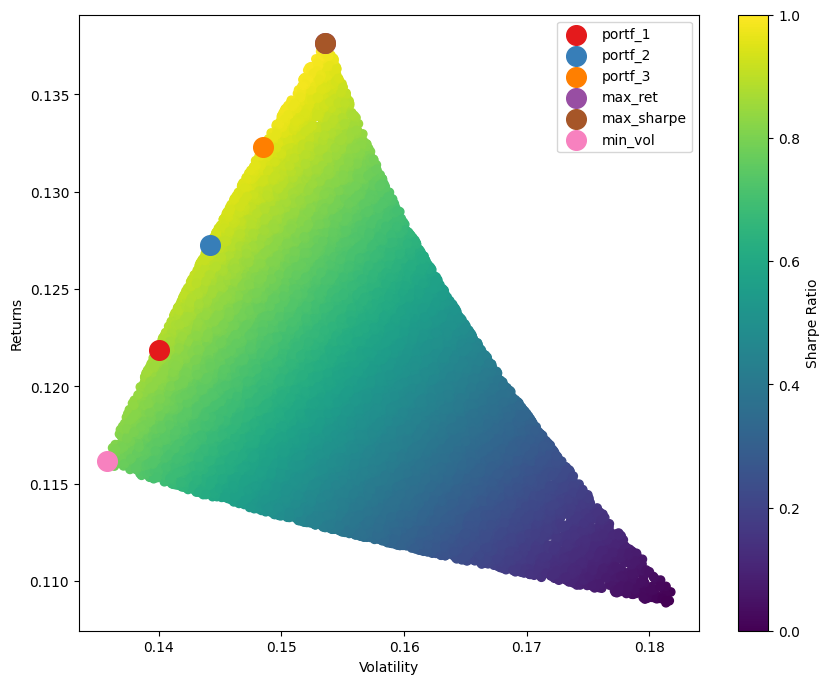

In [ ]:
# efficient frontier chart
plt.figure(figsize=(10,8))
plt.scatter(portf["std"], portf["returns"], c=portf["sharpe"], cmap="viridis")
for n,i in enumerate(index):
  plt.scatter(efficient_df.loc[i,"std"],efficient_df.loc[i,"returns"],s=200,color=colors[n],label=i)

# color based on the sharpe
cbar = plt.colorbar()
cbar.set_label("Sharpe Ratio")

plt.xlabel("Volatility")
plt.ylabel("Returns")
plt.legend()
plt.show()

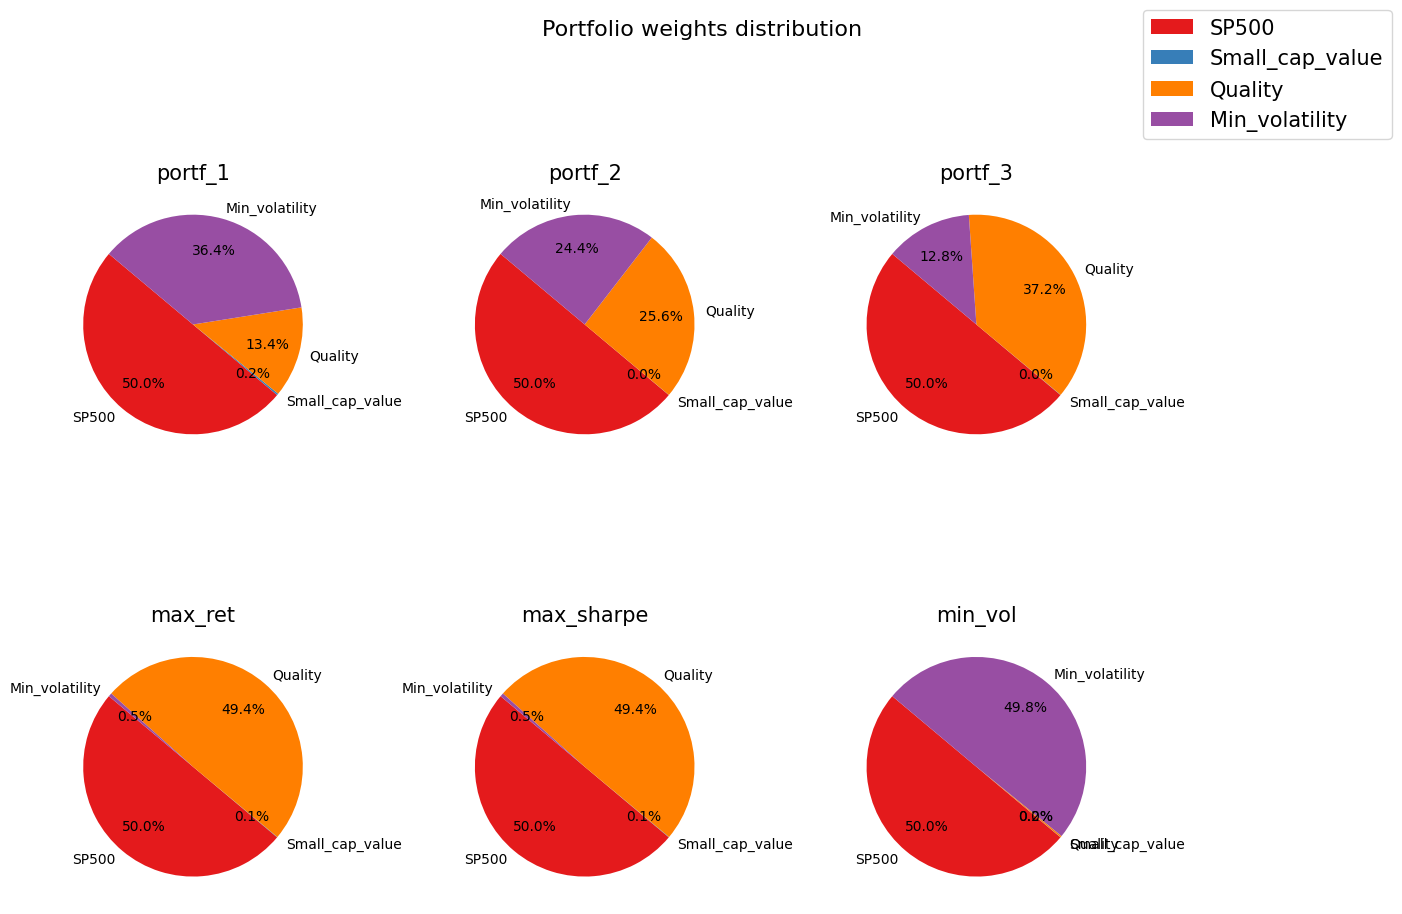

In [ ]:
# plot the pie chart for a clear understanding of the weight of each portfolio

fig, axs = plt.subplots(2, 3, figsize=(14,10))
fig.suptitle('Portfolio weights distribution', fontsize=16)

for n, i in enumerate(index):
  ax = axs[n//3, n%3]
  weights = efficient_df.loc[i, 'weights']

  # plot the pie chart
  ax.pie(weights,labels=best_assets,autopct='%1.1f%%', startangle=140,colors=colors,
         pctdistance=0.7,    # percentange on the center
         labeldistance=1.1,  # distant labels
         )

  # set the title
  ax.set_title(i, fontsize=15)

# legend
fig.legend(best_assets, loc='upper right', fontsize=15)

plt.tight_layout(rect=[0, 0, 0.85, 0.95])
plt.show()

In [ ]:
# portfolio selection

# Buy & Hold

# clear the unnecesary data
data_portf = data.copy()
data_portf.drop(columns=not_necessary,inplace=True)
portfolio_bh =pd.DataFrame( index=data_portf.index,columns = index)

# create a portfolio simulation for each portfolio
for i,n in enumerate(index):
  first_prices = data_portf.iloc[0].values
  weight = efficient_df.iloc[i,0]

  # n of share based on the weights
  shares_bh = (initial_capital * weight) / first_prices
  portfolio = (data_portf.values * shares_bh).sum(axis=1)
  portfolio_bh[n] = portfolio

# create the returns of the Buy & Hold
returns_bh = portfolio_bh.pct_change(1)
returns_bh.dropna(inplace= True)
returns_bh.index = pd.to_datetime(returns_bh.index).strftime('%Y-%m')

returns_bh.head()

portf_1   portf_2   portf_3   max_ret  max_sharpe   min_vol
Date                                                                 
2014-06  0.016404  0.015461  0.014648  0.013783    0.013783  0.017267
2014-07 -0.013749 -0.012809 -0.012002 -0.011141   -0.011141 -0.014600
2014-08  0.041028  0.041566  0.042088  0.042644    0.042644  0.040418
2014-09 -0.012129 -0.012340 -0.012664 -0.013006   -0.013006 -0.011653
2014-10  0.031677  0.029939  0.028301  0.026560    0.026560  0.033548

In [ ]:
# Rebalanced portfolio

# I'm not considering the commision, so the returns is overestimated
portfolio_reb = pd.DataFrame(index=data_portf.index,columns=index)

for i,n in enumerate(index):
  shares = efficient_df.iloc[i, 0]
  values = []
  for date in data_portf.index:
    prices = data_portf.loc[date].values
    V = np.dot(shares, prices)
    values.append(V)

    # quarterly rebalanced
    '''
    if date.month in [1, 4, 7, 10]:
      weight = efficient_df.iloc[i, 0]
      shares = (V * weight) / prices
    '''

    # yearly rebalancer

    if date.month == 1 :

      weight = efficient_df.iloc[i, 0]
      shares = (V * weight) / prices

  portfolio_reb[n] = values

# create the returns of the Rebalanced portfolio
returns_reb = portfolio_reb.pct_change(1)
returns_reb.dropna(inplace= True)
returns_reb.index = pd.to_datetime(returns_reb.index).strftime('%Y-%m')

portfolio_reb.head()

portf_1      portf_2      portf_3      max_ret   max_sharpe  \
Date                                                                          
2014-05-31  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
2014-06-30  1016.403549  1015.460897  1014.648174  1013.783426  1013.783426   
2014-07-31  1002.429524  1002.453508  1002.470389  1002.488408  1002.488408   
2014-08-31  1043.556730  1044.121027  1044.662685  1045.238174  1045.238174   
2014-09-30  1030.899939  1031.236566  1031.432990  1031.643424  1031.643424   

                min_vol  
Date                     
2014-05-31  1000.010000  
2014-06-30  1017.277367  
2014-07-31  1002.425035  
2014-08-31  1042.941082  
2014-09-30  1030.787254

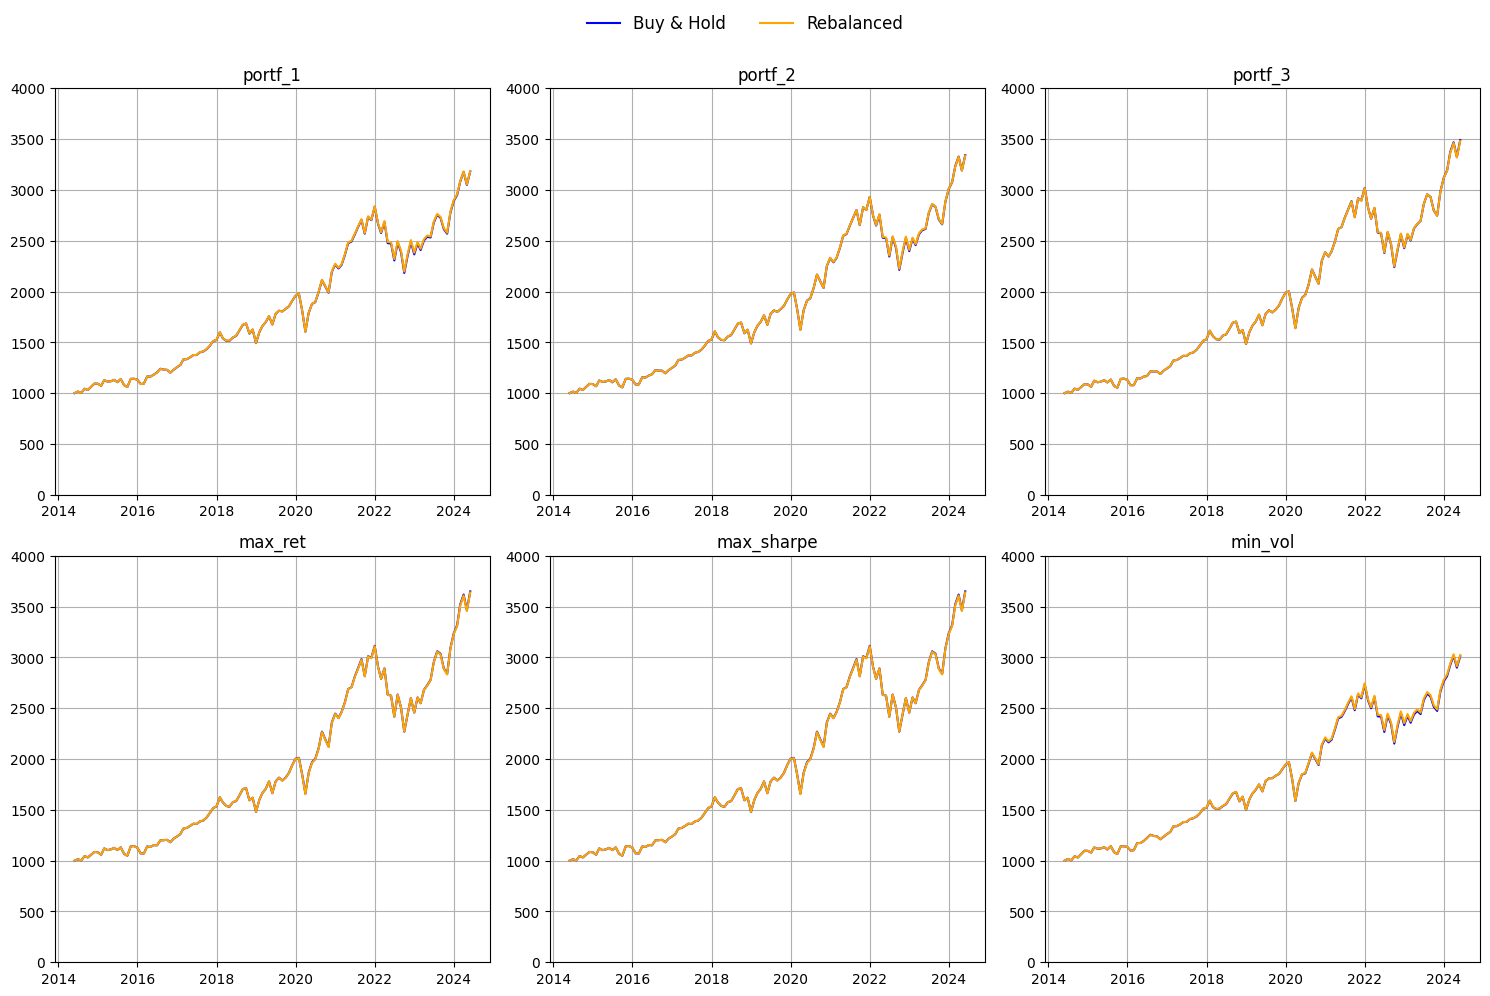

In [ ]:
# plot the result of the portfolio optimization for looking the best one
plt.figure(figsize=(15,10))
for i,n in enumerate(index):
  plt.subplot(2,3,i+1)
  plt.plot(portfolio_bh[n],color="blue")
  plt.plot(portfolio_reb[n],color="orange")
  plt.title( n)
  plt.ylim(0,4000)
  plt.grid()
plt.gcf().legend(
    ["Buy & Hold", "Rebalanced"],
    loc="upper center",
    ncol=2,
    fontsize=12,
    frameon=False
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


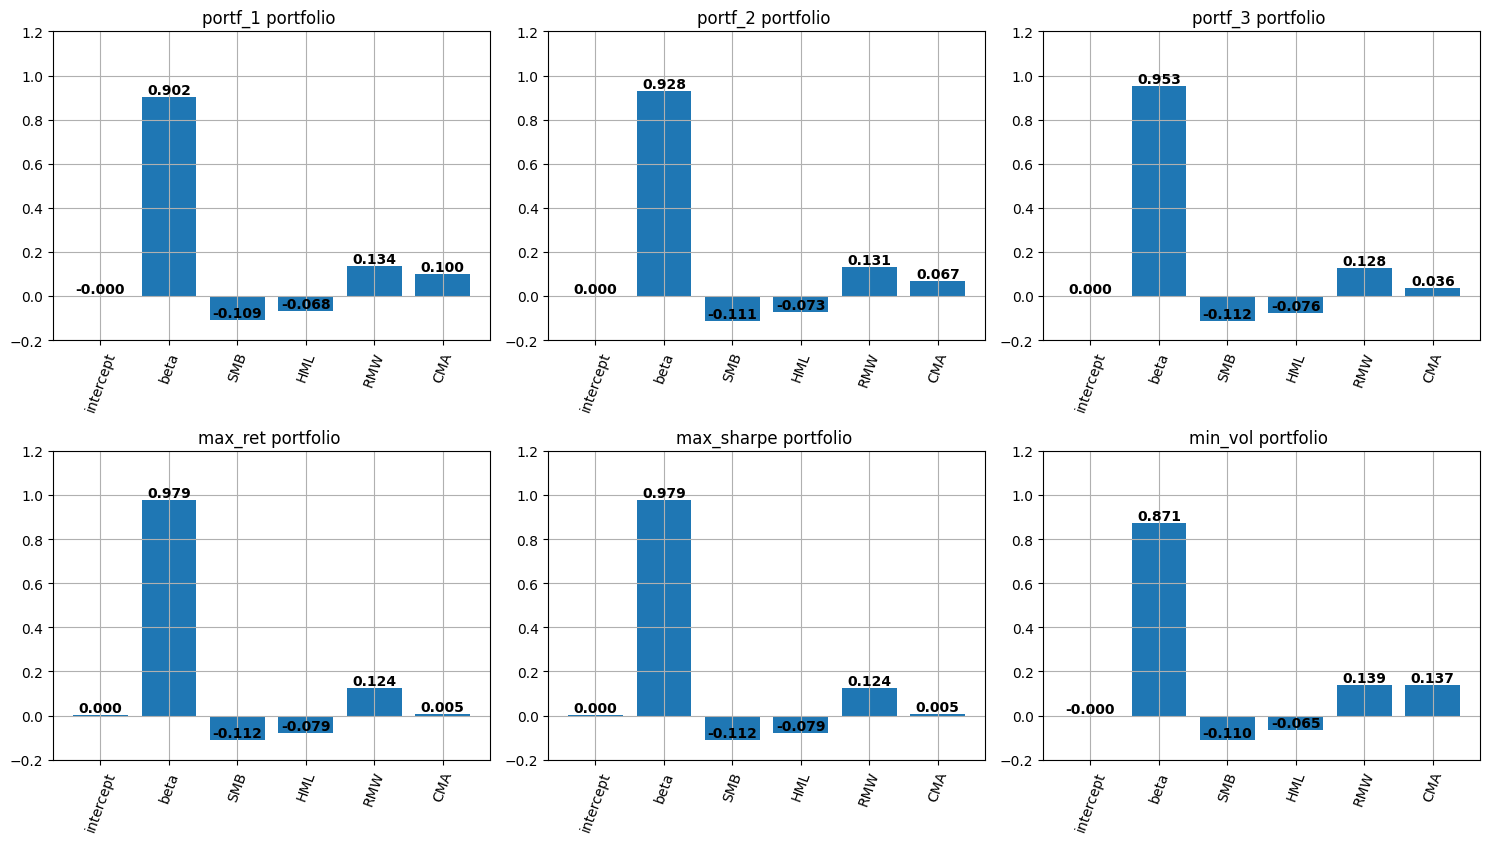

In [ ]:
# looking the factor of each portofolio using the Buy & Hold portfolios

# use the model
for i in index:
  ff_data[i] = returns_bh[i] - risk_free
  formula = f'{i} ~ Mkt + SMB + HML + RMW + CMA'
  ff_model = smf.ols(formula=formula, data=ff_data).fit()
  factors[i] = ff_model.params.values

# plot the results
plt.figure(figsize=(15,12))

for n,i in enumerate(index):
  plt.subplot(3,3,n+1)
  bars = plt.bar(fact_list,factors[i])
  for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height:.3f}", ha='center', va='bottom',  fontsize=10,weight="bold")
  plt.xticks(rotation=70)
  plt.title(i+" portfolio ")
  plt.ylim(-0.2,1.2)
  plt.grid()

plt.tight_layout()
plt.show()

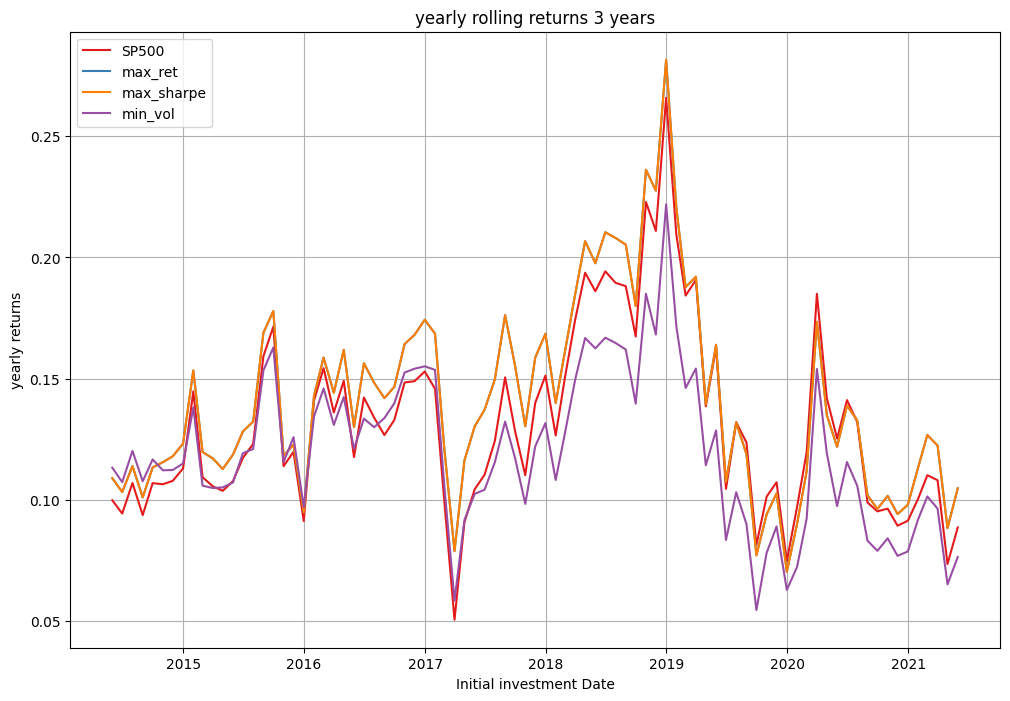

In [ ]:
# rolling returns portfolio

periods = 36

# take the benchmark rolling and set it in the first column
rolling_bh = (portfolio_bh.shift(-periods)/portfolio_bh)**(n_months/periods)-1
rolling_bh[benchmark] = rolling_returns[benchmark]
cols = [benchmark] + [i for i in rolling_bh.columns if i != benchmark]
rolling_bh = rolling_bh[cols]

# to keep a clear understanding I consider only the classical portfolio and drop the other
rolling_bh.drop(columns=["portf_1","portf_2","portf_3"],inplace=True)

# plotting the results
plt.figure(figsize=(12,8))

for i, col in enumerate(rolling_bh.columns):
    plt.plot(rolling_bh.index, rolling_bh[col], color=colors[i % len(colors)], label=col)
plt.legend(rolling_bh.columns, loc='upper left')
plt.title("yearly rolling returns "+ str(int(periods/12))+" years")
plt.ylabel("yearly returns")
plt.xlabel("Initial investment Date")
plt.grid()

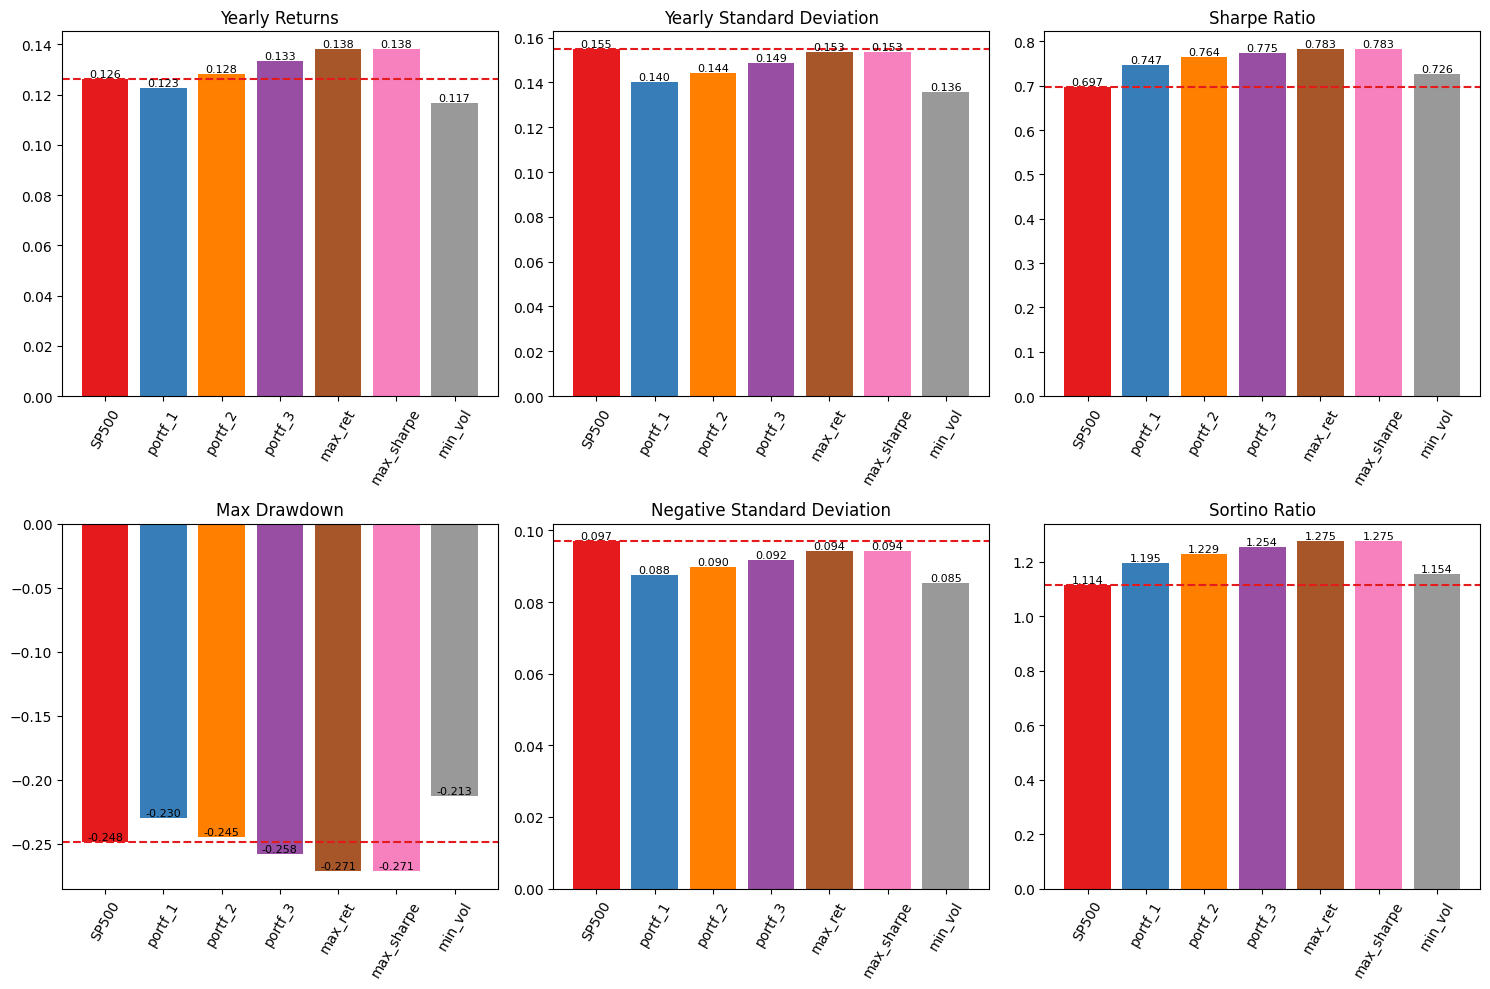

In [ ]:
# Metrics of portfolio compared to the S&P500

# keep the benchmark at the first position
returns_bh[benchmark] = returns[benchmark]
cols = [benchmark] + [i for i in returns_bh.columns if i != benchmark]
returns_bh = returns_bh[cols]

# calculate the mean and std of the portfolio
mean_returns_bh = np.prod(1+returns_bh,axis=0)**(n_months/len(returns_bh)) -1
std_returns_bh = returns_bh.std() * np.sqrt(n_months)


# using the same previus code to looking metrics
plt.figure(figsize=(15, 10))

# mean ret
plt.subplot(2, 3, 1)
bars = plt.bar(mean_returns_bh.index, mean_returns_bh, color=colors)
plt.xticks(rotation=60)
plt.title("Yearly Returns")
plt.axhline(mean_returns_bh.iloc[0], color='#E41A1C', linestyle="--")
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height:.3f}", ha='center', va='bottom', fontsize=8)

# std
plt.subplot(2, 3, 2)
bars = plt.bar(std_returns_bh.index, std_returns_bh, color=colors)
plt.xticks(rotation=60)
plt.title("Yearly Standard Deviation")
plt.axhline(std_returns_bh.iloc[0], color='#E41A1C', linestyle="--")
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height:.3f}", ha='center', va='bottom', fontsize=8)

# sharpe
sharpe = (mean_returns_bh - rf)/ std_returns_bh
plt.subplot(2, 3, 3)
bars = plt.bar(sharpe.index, sharpe, color=colors)
plt.xticks(rotation=60)
plt.title("Sharpe Ratio")
plt.axhline(sharpe.iloc[0], color='#E41A1C', linestyle="--")
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height:.3f}", ha='center', va='bottom', fontsize=8)

# max dd
max_dd = []
for col in returns_bh.columns:
    cum_value = (1 + returns_bh[col]).cumprod()
    peak = cum_value.cummax()
    dd = (cum_value - peak) / peak
    max_dd.append(dd.min())

plt.subplot(2, 3, 4)
bars = plt.bar(returns_bh.columns, max_dd, color=colors)
plt.xticks(rotation=60)
plt.title("Max Drawdown")
plt.axhline(max_dd[0], color='#E41A1C', linestyle="--")
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height:.3f}", ha='center', va='bottom', fontsize=8)

# negative std
downside = []
for col in returns_bh.columns:
    neg_returns = np.minimum(returns_bh[col], 0)
    downside.append(np.sqrt((neg_returns**2).mean() * n_months))

plt.subplot(2, 3, 5)
bars = plt.bar(returns_bh.columns, downside, color=colors)
plt.xticks(rotation=60)
plt.title("Negative Standard Deviation")
plt.axhline(downside[0], color='#E41A1C', linestyle="--")
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height:.3f}", ha='center', va='bottom', fontsize=8)

# sortino
sortino = (mean_returns_bh - rf) / downside
plt.subplot(2, 3, 6)
bars = plt.bar(returns_bh.columns, sortino, color=colors)
plt.xticks(rotation=60)
plt.title("Sortino Ratio")
plt.axhline(sortino[0], color='#E41A1C', linestyle="--")
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height:.3f}", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


ADF statistic : 0.572
Critical value : 
1%: -3.486
5%: -2.886
10%: -2.580


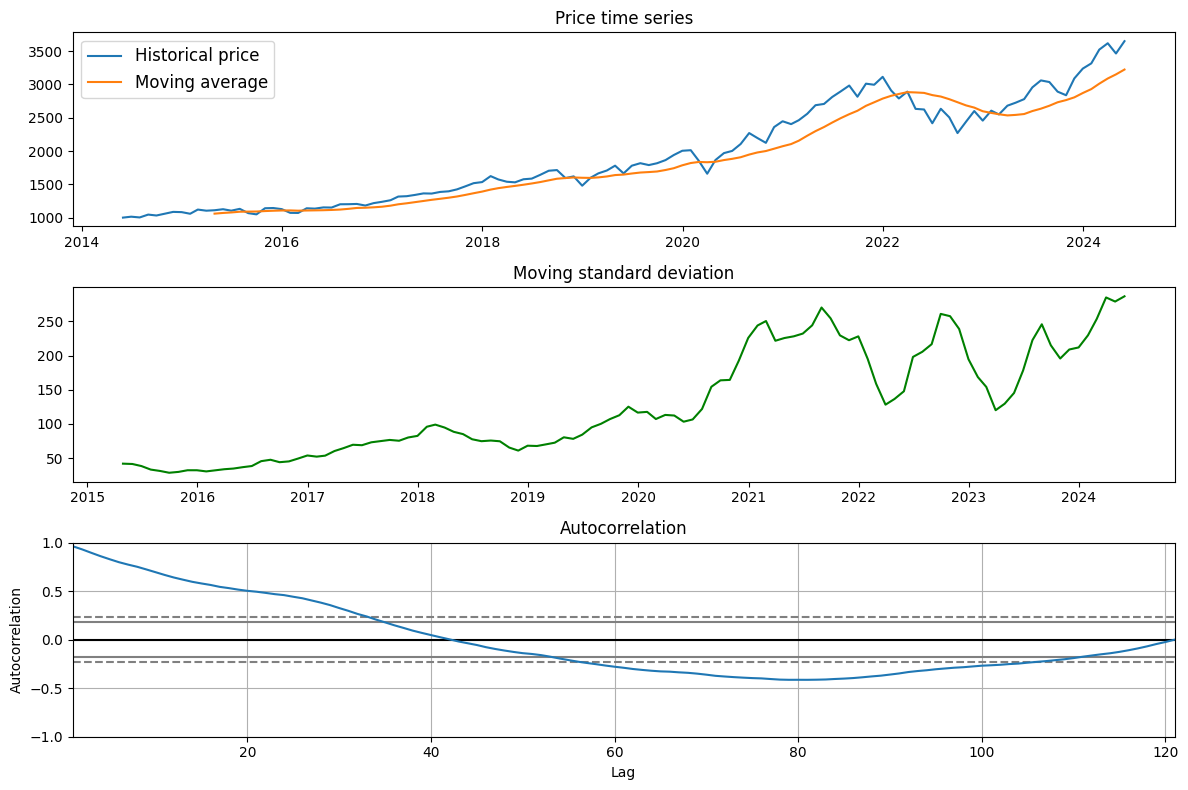

In [ ]:
# Time series forecasting using SARIMAX

# STATIONARY OF DATA
# to use the model ARIMA, data need these properties:
# - costant mean
# - costant variance
# - independent observation => autocorrelation = 0

# The model sets the parameter for stationarity automatically through differencing
# It is correct to manually check whether the data are effectively stationary


# take the name of the portfolio you want to predict
# index = ["portf_1","portf_2","portf_3","max_ret","max_sharpe","min_vol"]
asset = "max_sharpe"

# looking the not stationarity if i use the price data
data = portfolio_bh[asset]
data_rolling = data.rolling(12)    # time window
# 12 moving average
data_mean = data_rolling.mean()
# 12 moving standard deviation
data_std = data_rolling.std()

# looking ADF test, looking if the series is stationarity
# interpretation of ADF
# if ADF > of critical value the time series is not stationary
# with a confidence of 99% ,95% or 90 %
result = adfuller(data)
print("ADF statistic :" , np.round(result[0],3))
print("Critical value : ")
for key,value in result[4].items():
  print("%s: %.3f" % (key,value))

# plotting the time series with mean
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
plt.plot(data, label ="Historical price")
plt.plot(data_mean, label = "Moving average")
plt.legend(fontsize=12)
plt.title("Price time series")

# plotting the std deviation
plt.subplot(3,1,2)
plt.plot(data_std,color="green")
plt.title("Moving standard deviation")

# plotting the autocorrelation
plt.subplot(3,1,3)
autocorrelation_plot(data)
plt.title("Autocorrelation")

plt.tight_layout()
plt.show()


ADF statistic : -12.055
Critical value :
1%: -3.487
5%: -2.886
10%: -2.580


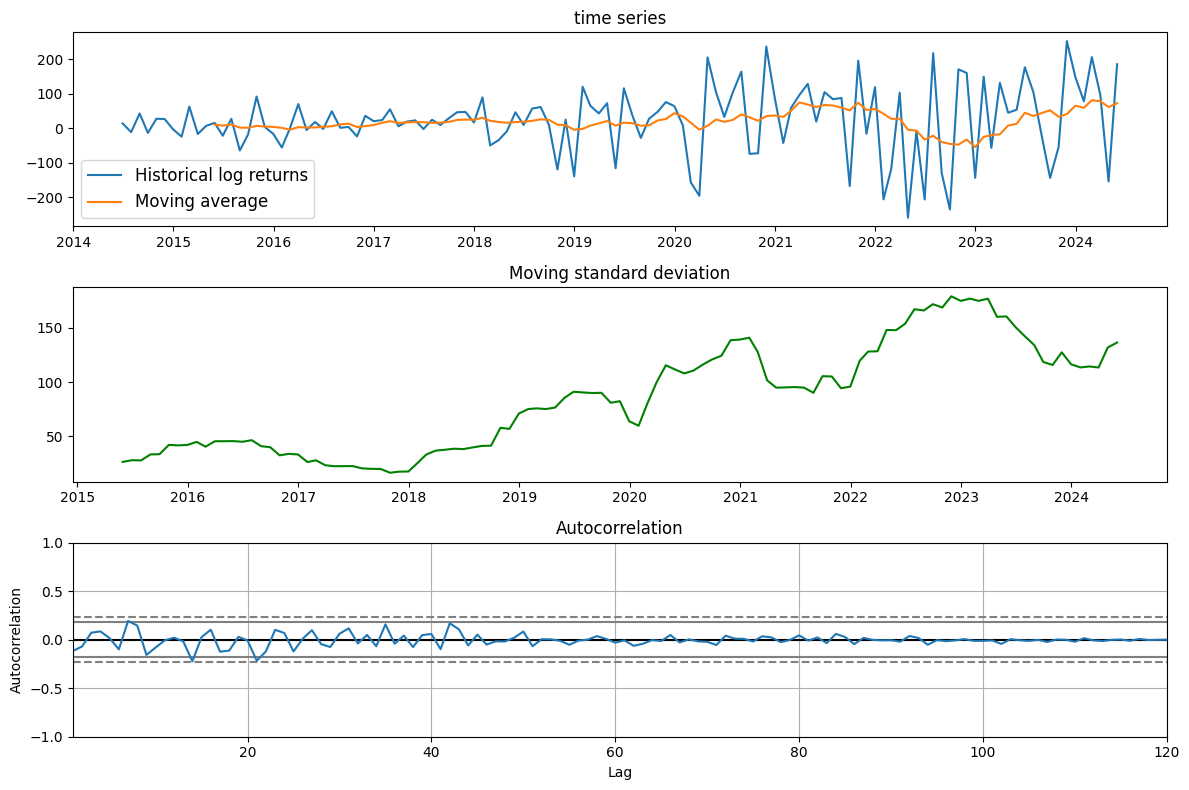

In [ ]:
# detrending price data with difference
# automatic approach used by the SARIMAX model to look the automatical stationarity
data_diff = data.diff()
data_diff.dropna(inplace=True)

# looking ADF to test the stationarity
result = adfuller(data_diff)
print("ADF statistic :" , np.round(result[0],3))
print("Critical value :")
for key,value in result[4].items():
  print("%s: %.3f" % (key,value))

# plotting the stationarity of log returns time series
data_rolling = data_diff.rolling(12)
data_mean = data_rolling.mean()
data_std = data_rolling.std()

# plotting the stationarity of log returns time series
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
plt.plot(data_diff,label ="Historical log returns")
plt.plot(data_mean,label="Moving average")
plt.legend(fontsize=12, loc="lower left")
plt.title("time series")

# plotting the std deviation
plt.subplot(3,1,2)
plt.plot(data_std,color="green")
plt.title("Moving standard deviation")

# plotting the autocorrelation
plt.subplot(3,1,3)
autocorrelation_plot(data_diff)
plt.title("Autocorrelation")

plt.tight_layout()
plt.show()

ADF statistic : -9.322
Critical value :
1%: -3.487
5%: -2.886
10%: -2.580


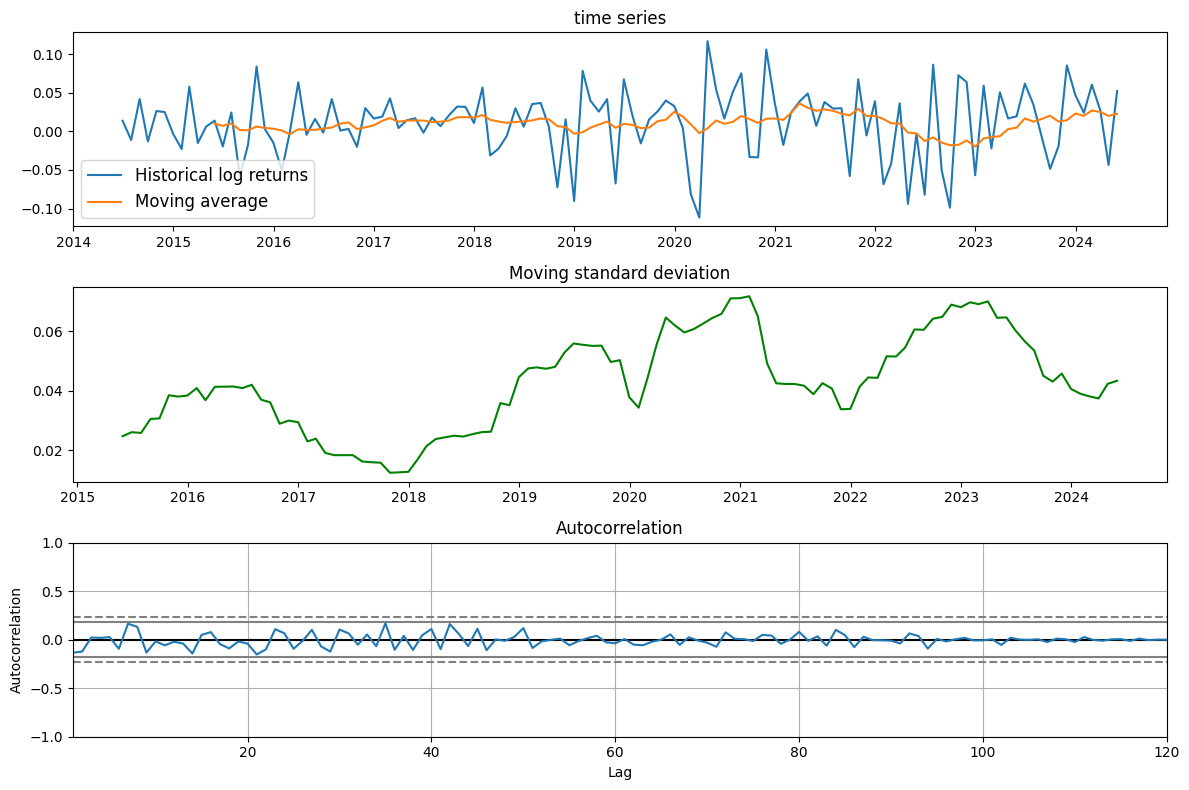

In [ ]:
# detrending data with log returns

# using log data for a linear stabilization
data_log = np.log(data)

# calculate the returns with the difference of log price
data_detrend = data_log .diff()
data_detrend.dropna(inplace=True)

# looking ADF to test the stationarity
result = adfuller(data_detrend)
print("ADF statistic :" , np.round(result[0],3))
print("Critical value :")
for key,value in result[4].items():
  print("%s: %.3f" % (key,value))

# plotting the stationarity of log returns time series
data_rolling = data_detrend.rolling(12)
data_mean = data_rolling.mean()
data_std = data_rolling.std()

# plotting the stationarity of log returns time series
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
plt.plot(data_detrend,label ="Historical log returns")
plt.plot(data_mean,label="Moving average")
plt.legend(fontsize=12, loc="lower left")
plt.title("time series")

# plotting the std deviation
plt.subplot(3,1,2)
plt.plot(data_std,color="green")
plt.title("Moving standard deviation")

# plotting the autocorrelation
plt.subplot(3,1,3)
autocorrelation_plot(data_detrend)
plt.title("Autocorrelation")

plt.tight_layout()
plt.show()

In [ ]:
# MODELLO SARIMAX
# library for the combination
import itertools

# library for the model
from statsmodels.tsa.statespace.sarimax import  SARIMAX

# library to manage the warnings
import warnings
warnings.filterwarnings("ignore")

# function to find the best parameters of SARIMAX MODEL
def arima_grid_search(dataframe, s):
    # possible value of parameters
    p  = q  = range(2)

    # set the correct differentiation for achive the best stationary property
    d = [1]

    # set all the combinations of parameters
    param_combinations = list(itertools.product(p, d, q))

    # prepare the object to save the best parameters
    lowest_aic, pdq, pdqs = None, None, None
    total_iterations = 0

    # iteration without s
    for order in param_combinations:

        # iteration considering s
        for (p, q, d) in param_combinations:
            seasonal_order = (p, q, d, s)
            total_iterations += 1

            # try the model with the parameters set
            try:
                model = SARIMAX(dataframe, order = order,
                               seasonal_order= seasonal_order,
                               enforce_stationarity=False,
                               enforce_invertibility=False,
                               disp = False
                               )
                model_result = model.fit(maxiter=200, disp=False)

                # safe the best parameters
                if not lowest_aic or model_result.aic < lowest_aic:
                    lowest_aic = model_result.aic
                    pdq, pdqs = order, seasonal_order

            except Exception as ex:
                continue

    return lowest_aic, pdq, pdqs

# use the function to find the best parameters

# divide the data in test and validation
train = 0.66
validation = 0.25
train_size = int(len(data) * (train+validation))
train_data = data_log[:train_size]

# using the log of price data
lowest_aic, order, seasonal_order = arima_grid_search(train_data, 12)

# print the hyperparameters
print('ARIMA {}x{}'.format(order, seasonal_order))
print('Lowest AIC: %.3f'%lowest_aic)

ARIMA (0, 1, 0)x(0, 1, 1, 12)
Lowest AIC: -257.275


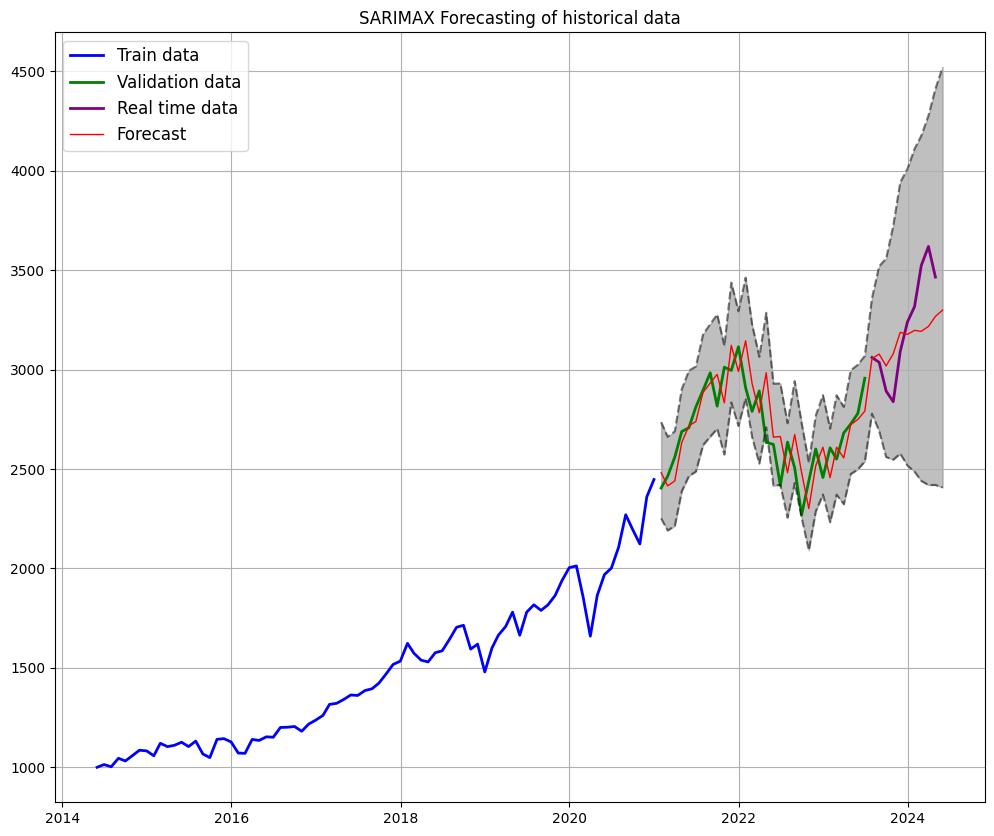

In [ ]:
# use the parameters to set the model

model = SARIMAX(train_data,
                order = order,
                seasonal_order= seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False,
                disp = False
                )
model_results = model.fit(maxiter=200, disp=False)

# get the prediction based on train validation and real prediction
len_pred = int(len(data) * (1-train-validation))
len_train = len(train_data)
len_valid = int(len(data)*validation)
prediction = model_results.get_prediction(start=len_train-len_valid, end = len_train+len_pred)
prediction_lu = prediction.conf_int()

# take the value of prediction
forecast_values = prediction.predicted_mean
forecast_index = prediction_lu.index
lower_forecast = prediction_lu.iloc[:,0]
upper_forecast = prediction_lu.iloc[:,1]

# convert the prediction to the same scale of price
forecast_values = np.exp(forecast_values)
lower_forecast = np.exp(lower_forecast)
upper_forecast = np.exp(upper_forecast)

# divide the real data
hist_train_data = data.iloc[:len_train-len_valid].copy()
hist_valid_data = data.iloc[len_train-len_valid:len_train].copy()
hist_prev_data = data.iloc[len_train:len_train+len_pred].copy()

# plot training data
plt.figure(figsize=(12,10))
plt.plot(hist_train_data.index,
         hist_train_data.values,label="Train data", linewidth=2, color="blue")
# plot validation data
plt.plot(hist_valid_data.index,
         hist_valid_data.values,label="Validation data", linewidth=2, color="green")
# plot real time prediction data
plt.plot(hist_prev_data.index,
         hist_prev_data.values,label="Real time data", linewidth=2, color="purple")
# plot forecast
plt.plot(forecast_values.index, forecast_values.values,
         color="red", label="Forecast", linewidth=1)

# plot confidence level
plt.plot(forecast_index, lower_forecast, "--", color="black", alpha=0.5)
plt.plot(forecast_index, upper_forecast, "--", color="black", alpha=0.5)

# color the area
plt.fill_between(forecast_index, lower_forecast, upper_forecast, color="gray", alpha=0.5)

plt.title("SARIMAX Forecasting of historical data")
plt.grid()
plt.legend(fontsize=12)
plt.show()

In [ ]:
# prevision error

from sklearn.metrics import mean_absolute_error,mean_squared_error

# validation error
test_mae = mean_absolute_error(hist_valid_data, forecast_values[:len_valid])
test_rmse = mean_squared_error(hist_valid_data, forecast_values[:len_valid])

# prediction error
pred_mae = mean_absolute_error(hist_prev_data, forecast_values[len_valid+1:])
pred_rmse = mean_squared_error(hist_prev_data, forecast_values[len_valid+1:])

print("Validation set:")
print(f"  MAE  = {test_mae:.2f}")
print(f"  RMSE = {test_rmse:.2f}")
print("\nPrediction set:")
print(f"  MAE  = {pred_mae:.2f}")
print(f"  RMSE = {pred_rmse:.2f}")


Validation set:
  MAE  = 119.94
  RMSE = 20387.83

Prediction set:
  MAE  = 164.82
  RMSE = 42748.56


In [ ]:
# code to restart time series for another time period

#download the sp500 csv
sp = pd.read_csv("sp500.csv")

#set the Date as index
sp.set_index("Date",inplace=True)
sp.index = pd.to_datetime(sp.index)

#data has comma separated value so I change it with dot
sp = sp.replace(",", ".", regex=True)
sp = sp.apply(pd.to_numeric, errors='coerce')

In [ ]:
# use the teacher limit date
sp = sp.loc["2014-05-31":"2024-05-31"]

In [ ]:
# TRADING STRATEGY

# simple moving average
from itertools import product

# range for moving average
sma1_range = range(20, 81, 5)
sma2_range = range(140, 201, 10)

# log daily returns
sp["BH_Returns"] = np.log(sp["SP500"] / sp["SP500"].shift(1))
sp.dropna(inplace=True)

# list for take the results
sresults = []

# cycle for have the best sma1 and sma2 based on difference between strategy returns and market returns
for i, j in product(sma1_range, sma2_range):
  # use temp to not modified the sp df
  temp = sp.copy()

  # simulate the strategy
  temp["SMA1"] = temp["SP500"].rolling(i).mean()
  temp["SMA2"] = temp["SP500"].rolling(j).mean()
  temp["Position"] = np.where(temp["SMA1"] > temp["SMA2"], 1, 0)
  temp["Strategy"] = temp["Position"].shift(1) * temp["BH_Returns"]
  temp.dropna(inplace=True)

  # cumulative return and delta
  cum_ret = np.exp(temp[["Strategy","BH_Returns"]].sum())
  delta = cum_ret["Strategy"] - cum_ret["BH_Returns"]

  # take the results
  sresults.append({"SMA1": i, "SMA2": j, "Delta": delta, "CumStrategy": cum_ret["Strategy"], "CumReturns": cum_ret["BH_Returns"]})

results_sma = pd.DataFrame(sresults)

# print the max delta
best_sma = results_sma.loc[results_sma["Delta"].idxmax()]
print("SMA Strategy parameters:")
print(best_sma)


SMA Strategy parameters:
SMA1            45.000000
SMA2           190.000000
Delta           -0.569878
CumStrategy      2.370718
CumReturns       2.940597
Name: 40, dtype: float64


In [ ]:
# exponential moving average

# list for take the results
eresults = []

for i,j in product(sma1_range, sma2_range):
  temp = sp.copy()

   # simulate the strategy
  temp["EMA1"] = temp["SP500"].ewm(span=i, adjust=False).mean()
  temp["EMA2"] = temp["SP500"].ewm(span=j, adjust=False).mean()
  temp["Position"] = np.where(temp["EMA1"] > temp["EMA2"], 1, 0)
  temp["Strategy"] = temp["Position"].shift(1) * temp["BH_Returns"]
  temp.dropna(inplace=True)

  cum_ret = np.exp(temp[["Strategy","BH_Returns"]].sum())
  delta = cum_ret["Strategy"] - cum_ret["BH_Returns"]

  eresults.append({"EMA1": i, "EMA2": j, "Delta": delta, "CumStrategy": cum_ret["Strategy"], "CumReturns": cum_ret["BH_Returns"]})

results_ema = pd.DataFrame(eresults)

best_ema = results_ema.loc[results_ema["Delta"].idxmax()]
print("EMA Strategy parameters:")
print(best_ema)


EMA Strategy parameters:
EMA1            35.000000
EMA2           150.000000
Delta           -0.993383
CumStrategy      2.281338
CumReturns       3.274720
Name: 22, dtype: float64


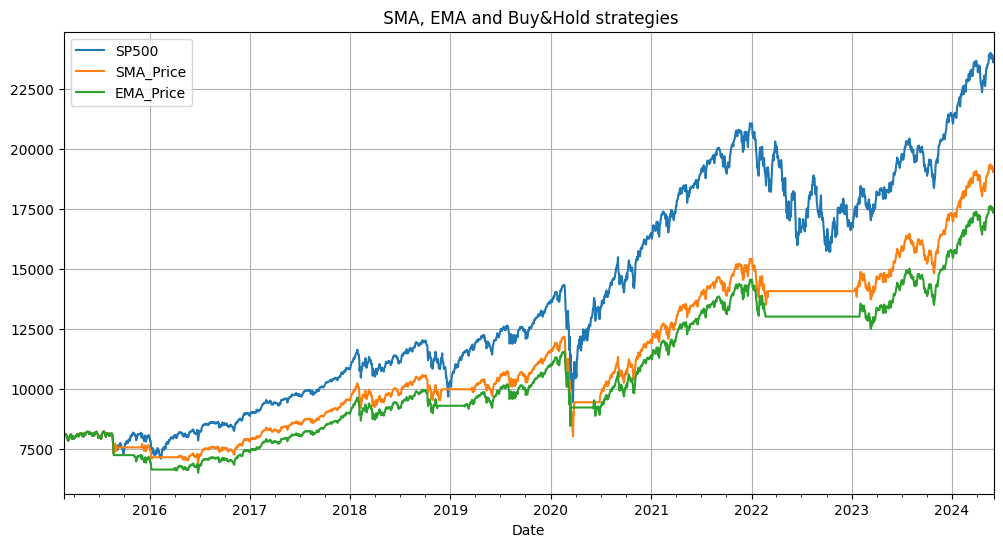

In [ ]:
# simulate the strategy with the best parameters finded
df = sp.copy()

# simple moving average
df["SMA1"] = df["SP500"].rolling(int(best_sma.iloc[0])).mean()
df["SMA2"] = df["SP500"].rolling(int(best_sma.iloc[1])).mean()
df["SMA_Position"] = np.where(df["SMA1"]>df["SMA2"],1,0)
df["SMA_Returns"] = df["SMA_Position"].shift(1)*df["BH_Returns"]

# exponential moving average
df["EMA1"] = df["SP500"].ewm(span=int(best_ema.iloc[0]), adjust=False).mean()
df["EMA2"] = df["SP500"].ewm(span=int(best_ema.iloc[1]), adjust=False).mean()
df["EMA_Position"] = np.where(df["EMA1"]>df["EMA2"],1,0)
df["EMA_Returns"] = df["EMA_Position"].shift(1)*df["BH_Returns"]

df.dropna(inplace=True)

# come back to the price data
df["SMA_Cum"] = np.exp(df["SMA_Returns"].cumsum())
df["EMA_Cum"] = np.exp(df["EMA_Returns"].cumsum())

# use the same initial price
initial_price = df["SP500"].iloc[0]
df["SMA_Price"] = df["SMA_Cum"] * initial_price
df["EMA_Price"] = df["EMA_Cum"] * initial_price

# plot the strategies prices compared to the benchmark
df[[benchmark, "SMA_Price", "EMA_Price"]].plot(figsize=(12,6), grid=True)
plt.title(" SMA, EMA and Buy&Hold strategies")
plt.show()

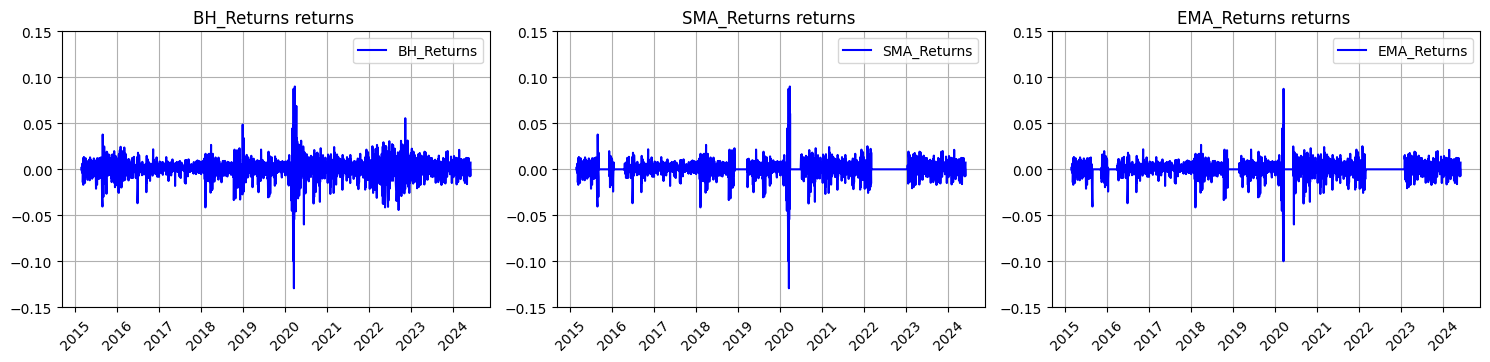

In [ ]:
# plotting returns

# take the returns data
df_ret = df[["BH_Returns","SMA_Returns","EMA_Returns"]]

# plotting returns
plt.figure(figsize=(15,10))
for i,ticker in enumerate(df_ret.columns):
  plt.subplot(3,3,i+1)
  plt.plot(df_ret[ticker],color="blue",label=ticker)
  plt.legend(loc="upper right")
  plt.title(ticker + " returns ")
  plt.ylim(-0.15,0.15)
  plt.xticks(rotation=45)
  plt.grid()
plt.tight_layout()
plt.show()

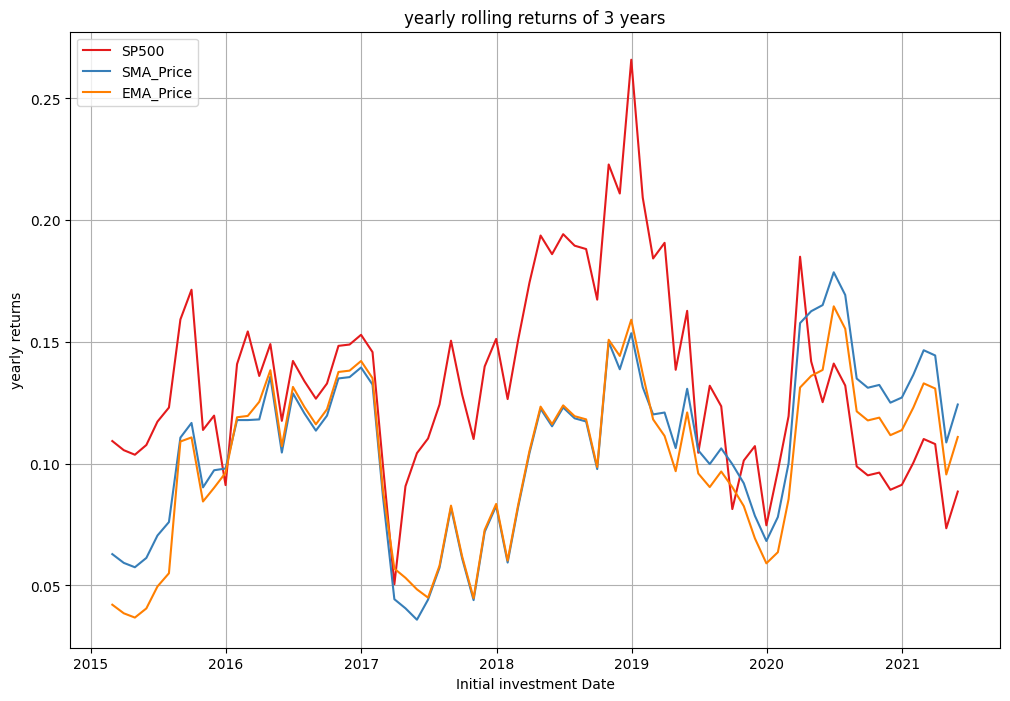

In [ ]:
# plotting rolling returns
periods = 36
n_months = 12

df = df[["SP500", "SMA_Price", "EMA_Price"]]

# use monthly data
df = df.resample("ME").last()
# calculet yearly rolling
strat_rolling_ret = (df.shift(-periods)/df)**(n_months/periods) - 1
rolling_returns = rolling_returns.dropna()

# plotting
plt.figure(figsize=(12,8))
for i, col in enumerate(df.columns):
    plt.plot(strat_rolling_ret.index, strat_rolling_ret[col], color=colors[i % len(colors)], label=col)
plt.legend(strat_rolling_ret.columns, loc='upper left')
plt.title("yearly rolling returns of "+ str(int(periods/12))+" years")
plt.ylabel("yearly returns")
plt.xlabel("Initial investment Date")
plt.grid()


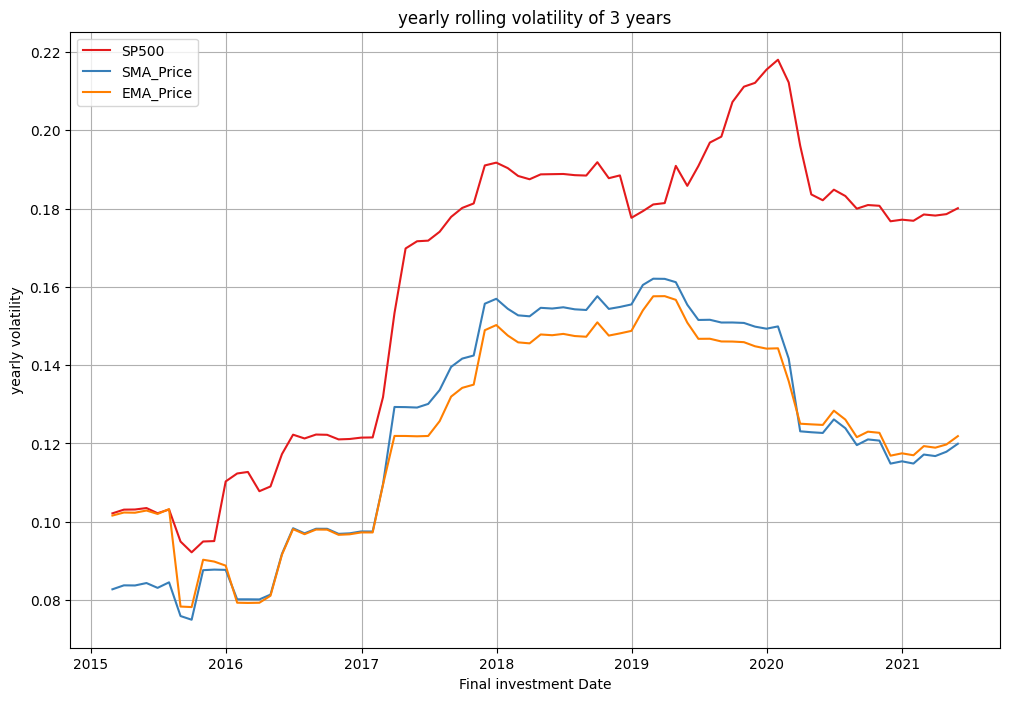

In [ ]:
# calculet rolling volatility
rolling_volatility = df.pct_change().rolling(periods).std()*np.sqrt(n_months)
rolling_volatility.dropna(inplace=True)

rolling_volatility.set_index(strat_rolling_ret.index[:len(rolling_volatility)],inplace=True)
plt.figure(figsize=(12,8))

for i, col in enumerate(df.columns):
    plt.plot(rolling_volatility.index, rolling_volatility[col], color=colors[i % len(colors)], label=col)
plt.legend(rolling_volatility.columns, loc='upper left')
plt.title("yearly rolling volatility of "+ str(int(periods/12))+" years")
plt.ylabel("yearly volatility")
plt.xlabel("Final investment Date")
plt.grid()